## Load modules

In [2]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
from scipy import stats
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

import sys
sys.path.insert(1, '../../../') # to include my util file in previous directory
import utils as u # my personal functions
u.check_python_version()
u.check_virtual_memory()

3.7.6 (default, Jan  8 2020, 19:59:22) 
[GCC 7.3.0]
Virtual memory usage - total: 252 GB / available: 63 GB / percent used: 74.8 %


# Check orography

## Relief.nc original file for LMDZ (~15km)
From Jean-Zay: /gpfswork/rech/psl/commun/IGCM/ATM/INPUT_CE0L

Explanation and origin: http://lmdz.lmd.jussieu.fr/utilisateurs/reunion-utilisateurs/2018/jlmdz2018-sepulchre.pdf

In [4]:
relief = xr.open_dataset('/home/mlalande/notebooks/Relief.nc').RELIEF
relief

<xarray.DataArray 'RELIEF' (latitude: 1080, longitude: 2160)>
[2332800 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -179.9167 -179.75 ... 179.75 179.9167
  * latitude   (latitude) float32 89.91655 89.74982 ... -89.74982 -89.91655
Attributes:
    units:     m
    title:     RELIEF
    lon_name:  RELIEF

In [4]:
u.deg2km(nlon=relief.longitude.size, nlat=relief.latitude.size, lat=30)

{'x': 16.049605207689172, 'y': 18.532487774093124, 'units': 'km'}

<IPython.core.display.Javascript object>


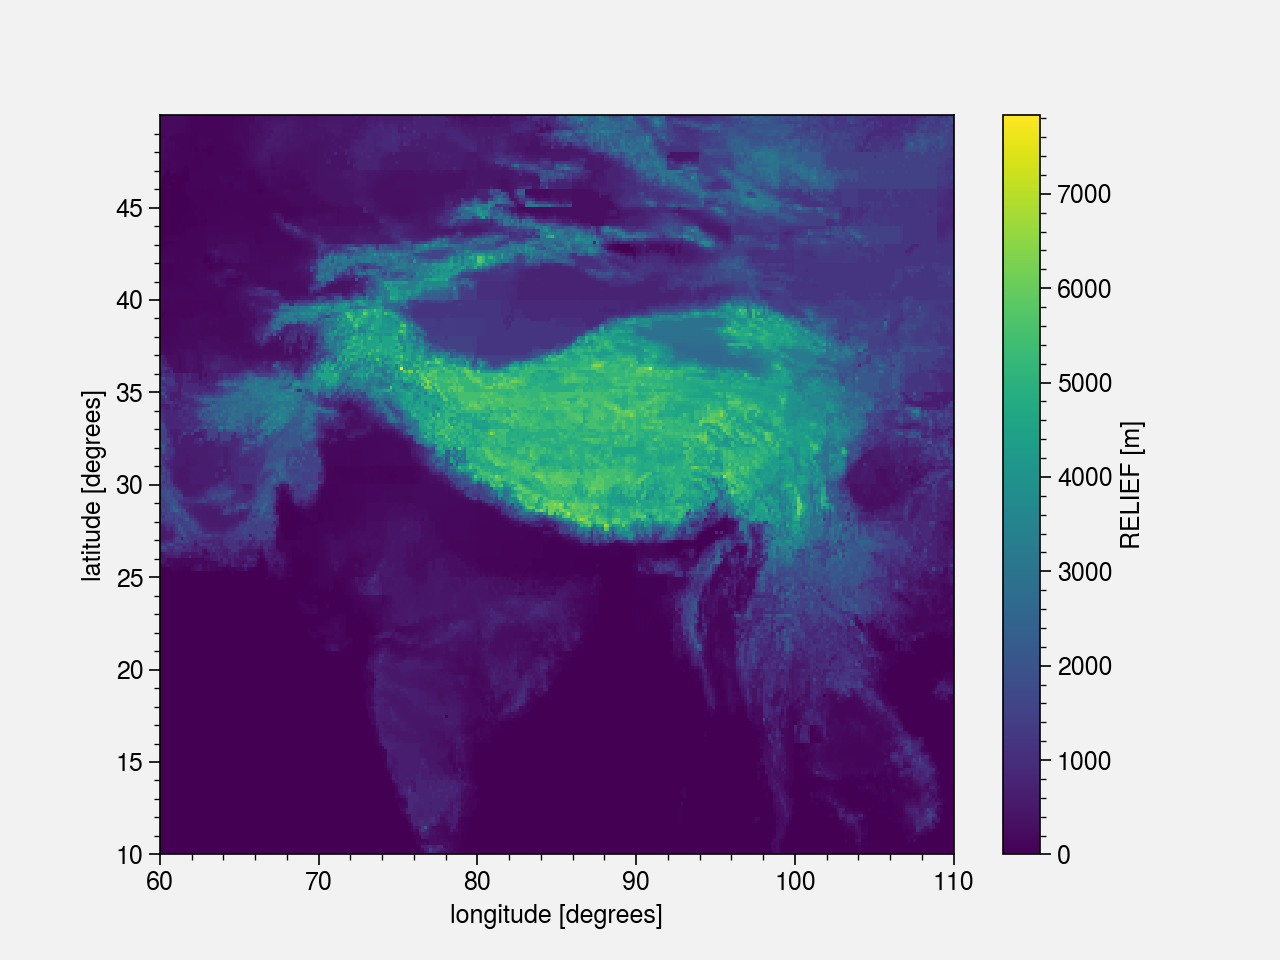

In [5]:
%matplotlib notebook
plt.figure()
relief.sel(latitude=slice(50,10), longitude=slice(60,110)).plot()

## NOAA NGDC GLOBE (1km)

http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NGDC/.GLOBE/.topo/datafiles.html

In [5]:
topo = xr.open_dataset('/data/mlalande/Relief/NOAA_NGDC_GLOBE_topo_1km.nc').topo
topo

<xarray.DataArray 'topo' (Y: 21600, X: 43200)>
[933120000 values with dtype=float32]
Coordinates:
  * X        (X) float32 -179.99583 -179.9875 -179.97917 ... 179.9875 179.99583
  * Y        (Y) float32 89.995834 89.9875 89.979164 ... -89.9875 -89.995834
Attributes:
    long_name:  elevation
    units:      m
    scale_max:  8752.0
    ncolor:     233
    CE:         8752
    CS:         0
    scale_min:  0.0
    maxncolor:  254
    colormap:   [16777215 1973790 65280 3329434 [2263842 3] [2330219 4] [9234...

In [7]:
u.deg2km(nlon=topo.X.size, nlat=topo.Y.size, lat=30)

{'x': 0.8024802603844585, 'y': 0.9266243887046561, 'units': 'km'}

<IPython.core.display.Javascript object>


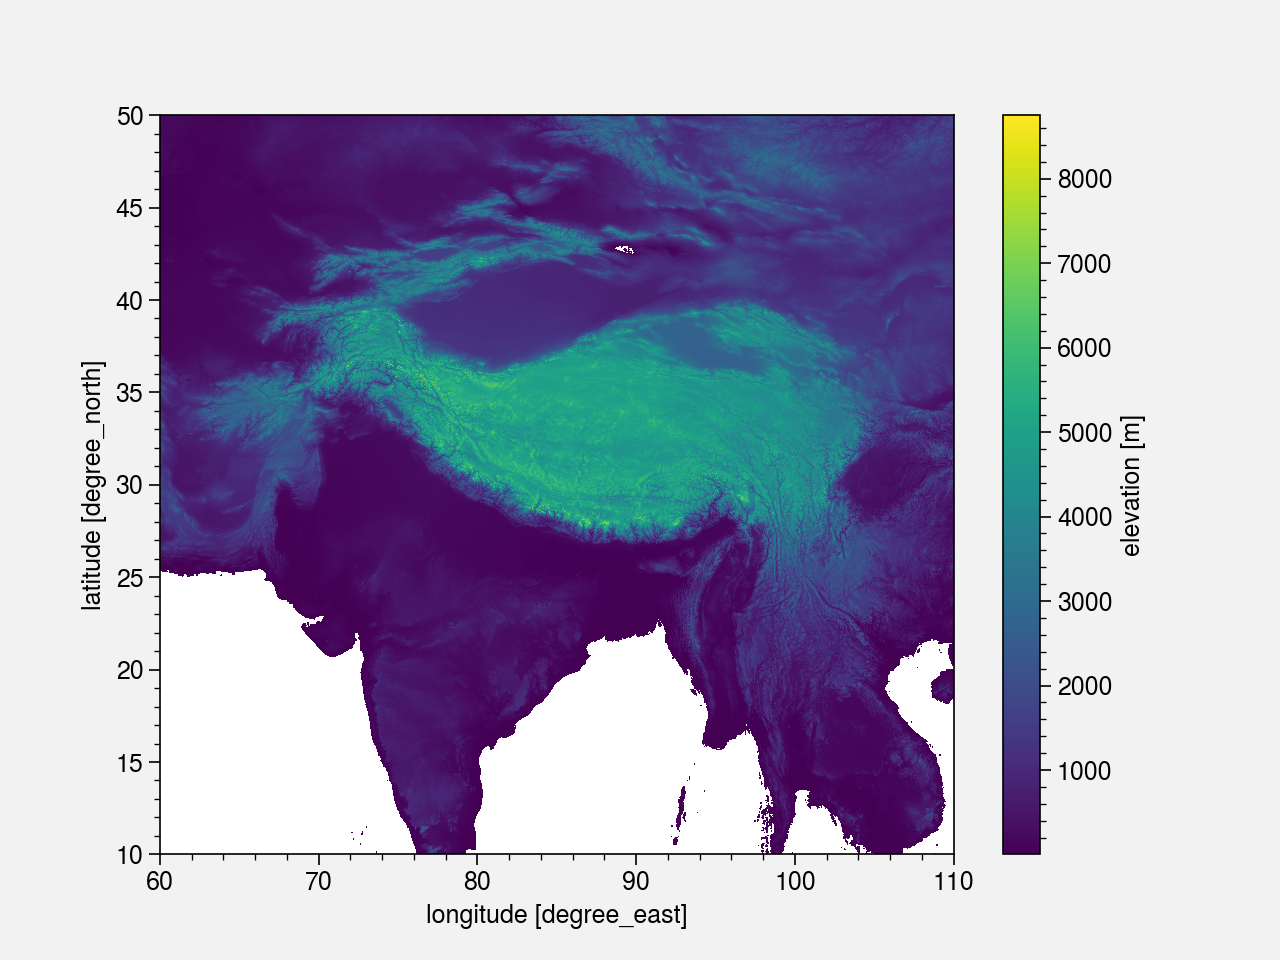

In [8]:
plt.figure()
topo.sel(Y=slice(50,10), X=slice(60,110)).plot()

**Everest**
- Altitude : 8 848 m
- Proéminence : 8 848 m
- Coordonnées : 27° 59′ 18″ nord, 86° 55′ 31″ est

http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NGDC/.GLOBE/.topo/figviewer.html?my.help=&map.Y.units=degree_north&map.Y.plotlast=29N&map.url=X+Y+fig-+colors+-fig&map.domain=+%7B+X+85.0+88.0+plotrange+Y+-26+29+plotrange+%7D&map.domainparam=+%2Fplotaxislength+432+psdef+%2Fplotborder+72+psdef+%2FXOVY+null+psdef&map.zoom=Zoom&redraw.x=29&redraw.y=19&map.Y.plotfirst=26N&map.X.plotfirst=85E&map.X.units=degree_east&map.X.modulus=360&map.X.plotlast=88E&map.topo.plotfirst=0&map.topo.units=m&map.topo.plotlast=8752&map.newurl.grid0=X&map.newurl.grid1=Y&map.newurl.land=draw+...&map.newurl.plot=colors&map.plotaxislength=432&map.plotborder=72&map.fnt=NimbusSanLSymbol&map.fntsze=12&map.color_smoothing=1&map.XOVY=auto

<IPython.core.display.Javascript object>


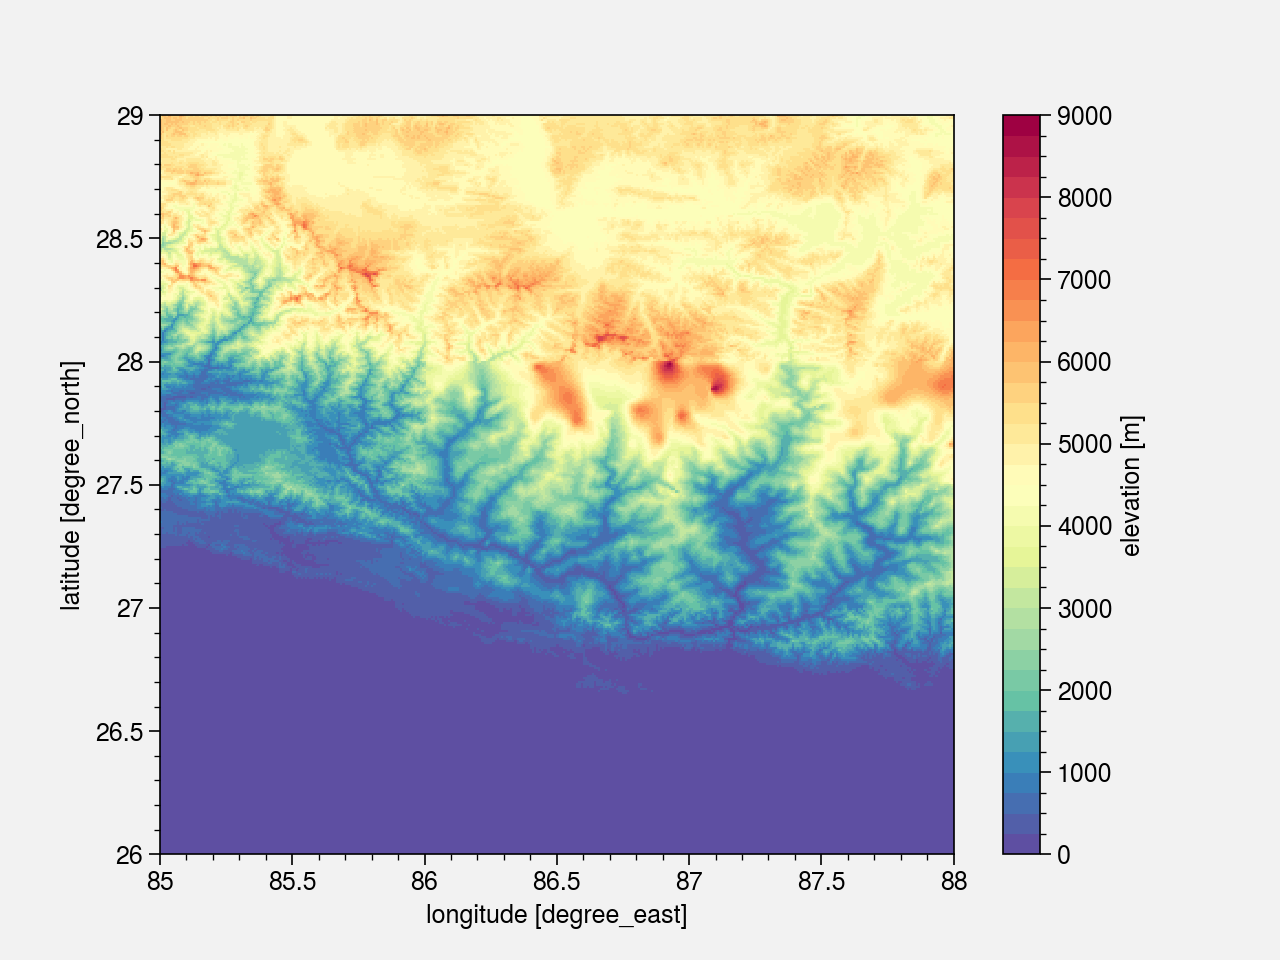

In [9]:
plt.figure()
topo.sel(Y=slice(29,26), X=slice(85,88)).plot(cmap='Spectral', levels=40)

## Orography for IPSL-CM6A-LR

In [6]:
orog = xr.open_dataarray(
    '/bdd/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r1i1p1f1/fx/orog/gr/latest/orog_fx_IPSL-CM6A-LR_historical_r1i1p1f1_gr.nc'
)
orog

<xarray.DataArray 'orog' (lat: 143, lon: 144)>
array([[2841.648 , 2841.648 , 2841.648 , ..., 2841.648 , 2841.648 , 2841.648 ],
       [2688.9688, 2697.9724, 2708.5688, ..., 2658.9578, 2668.209 , 2677.9058],
       [2618.7102, 2638.589 , 2658.8015, ..., 2562.443 , 2580.6404, 2599.4429],
       ...,
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,    0.    ],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,    0.    ],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,    0.    ]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 -90.0 -88.73239 -87.46479 ... 87.46479 88.73239 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    long_name:         Surface Altitude
    units:             m
    online_operation:  once
    cell_methods:      area: mean
    cell_measures:     area: areacella
    standard_name:     surface_altitude
    description:       The surface called 'surface' means the lower boundary ...

In [22]:
u.deg2km(nlon=144, nlat=143, lat=30)

{'x': 240.74407811533757, 'y': 139.9656419302138, 'units': 'km'}

### Try to represent 4 pixels around Everest

In [12]:
orog.sel(lat=slice(26,29), lon=slice(85,88))

<xarray.DataArray 'orog' (lat: 2, lon: 2)>
array([[ 118.52686,  589.78925],
       [2216.4688 , 4457.735  ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 26.619719 27.887323
  * lon      (lon) float32 85.0 87.5
Attributes:
    long_name:         Surface Altitude
    units:             m
    online_operation:  once
    cell_methods:      area: mean
    cell_measures:     area: areacella
    standard_name:     surface_altitude
    description:       The surface called 'surface' means the lower boundary ...

In [13]:
dy = 27.887323-26.619719
dy 

1.2676039999999986

In [14]:
dx = 87.5-85.0
dx

2.5

In [15]:
(27.887323-26.619719)/2

0.6338019999999993

In [8]:
latlim_everest = (26.619719-0.6338, 27.887323+0.6338)
latlim_everest

(25.985919, 28.521123)

In [9]:
lonlim_everest = (85.0-1.25, 87.5+1.25)
lonlim_everest

(83.75, 88.75)

<IPython.core.display.Javascript object>


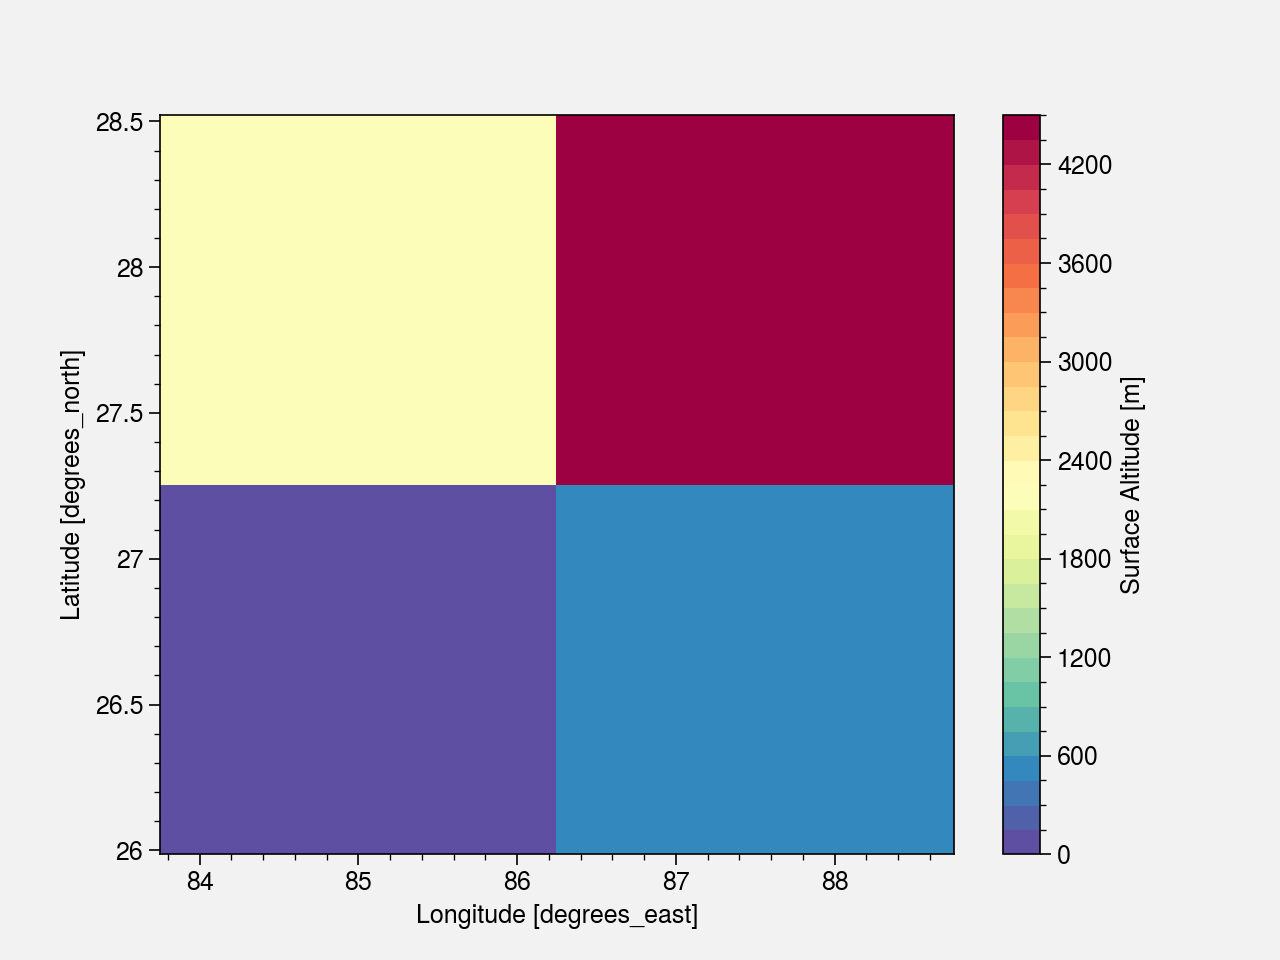

In [18]:
plt.figure()
orog.sel(lat=slice(26,29), lon=slice(85,88)).plot(cmap='Spectral', levels=40)

<IPython.core.display.Javascript object>


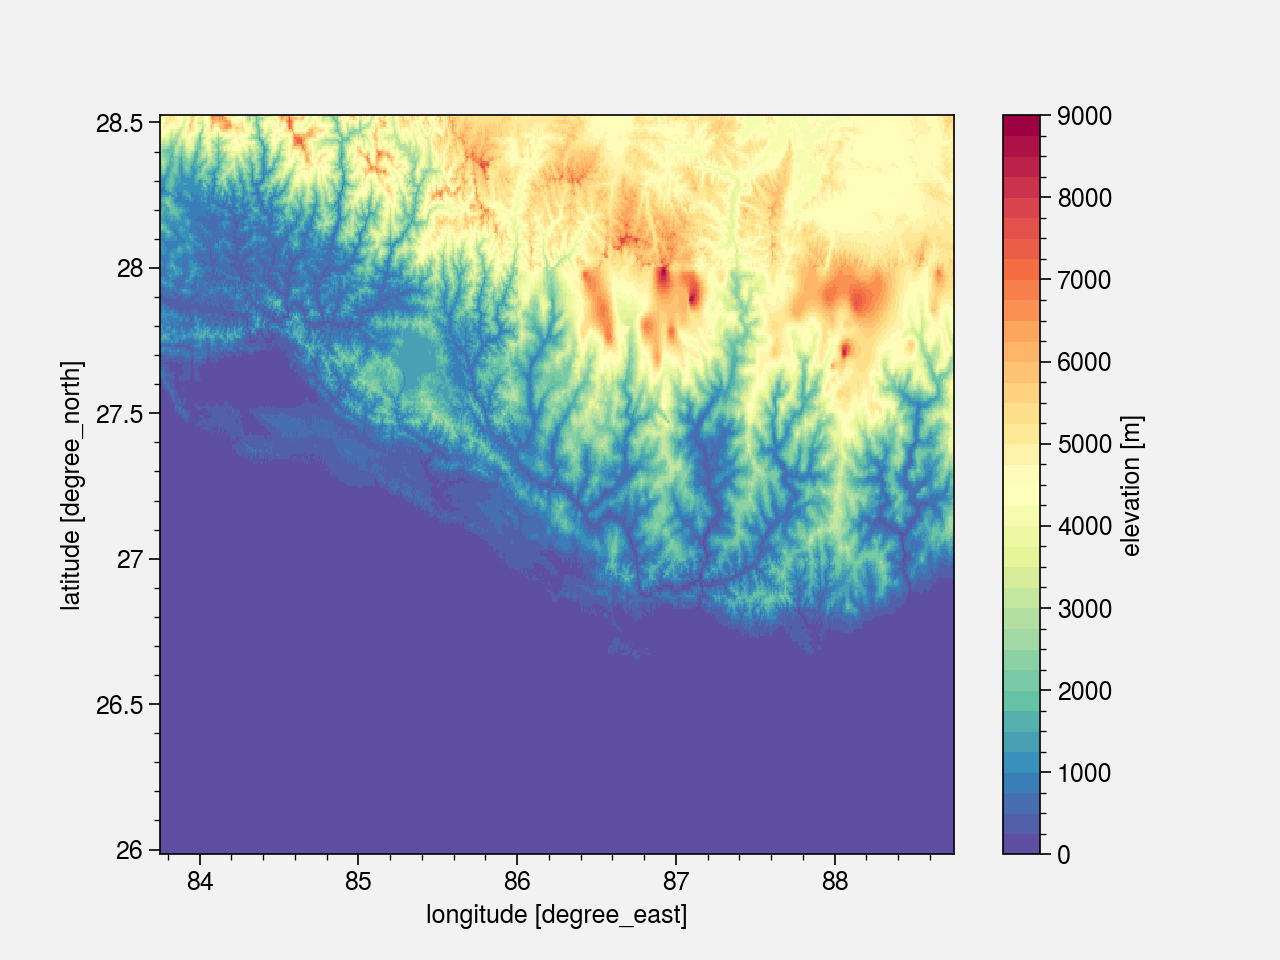

In [19]:
plt.figure()
topo.sel(Y=slice(latlim_everest[1],latlim_everest[0]), X=slice(lonlim_everest[0],lonlim_everest[1])).plot(cmap='Spectral', levels=40)

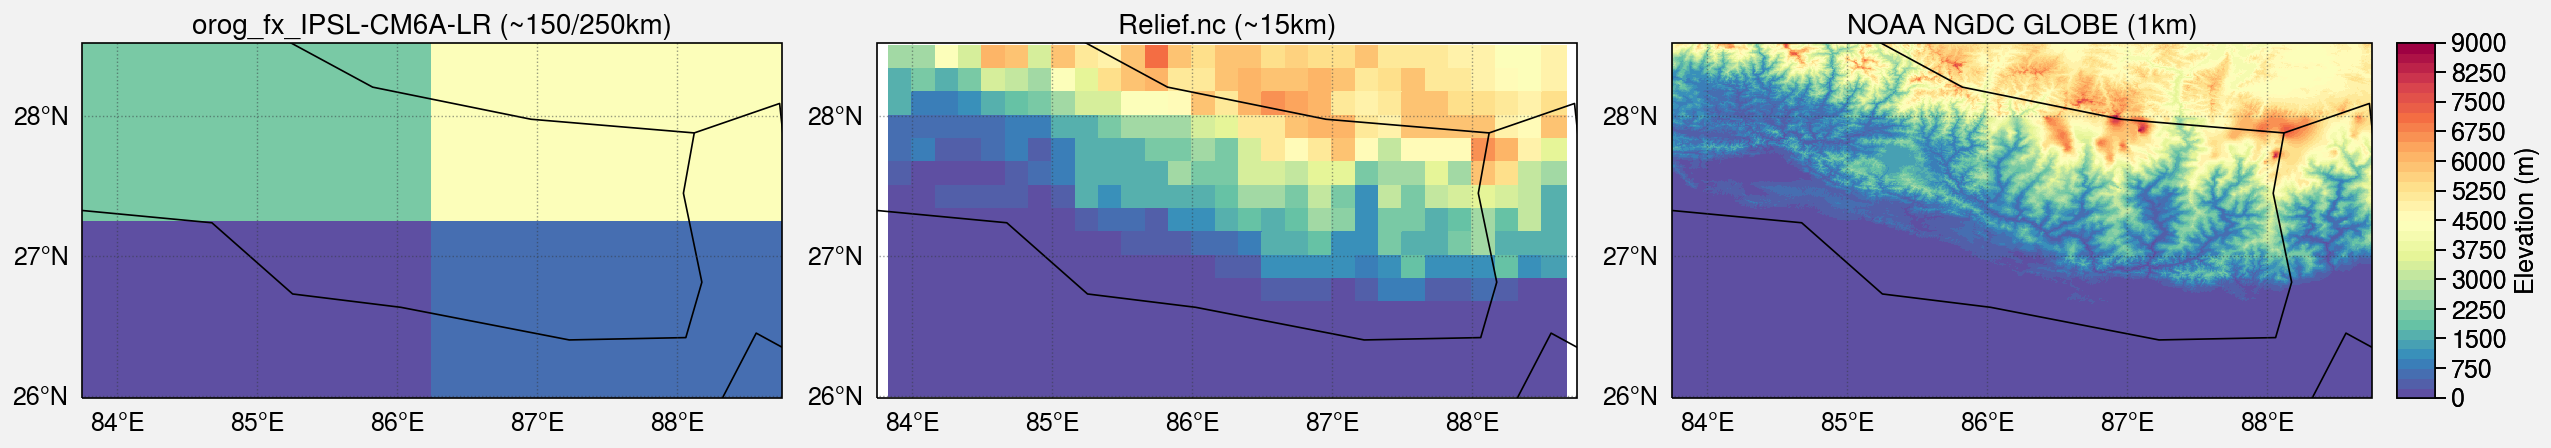

In [10]:
%matplotlib inline

f, axs = plot.subplots(proj='cyl', ncols=3, nrows=1, axwidth=3.5)

axs[0].pcolormesh(
    orog.sel(lat=slice(latlim_everest[0],latlim_everest[1]), lon=slice(lonlim_everest[0],lonlim_everest[1])),
#     colorbar='r',
    levels=plot.arange(0,9000,250),
    cmap='Spectral'
)
axs[0].format(title='orog_fx_IPSL-CM6A-LR (~150/250km)')

axs[1].pcolormesh(
    relief.sel(latitude=slice(latlim_everest[1],latlim_everest[0]), longitude=slice(lonlim_everest[0],lonlim_everest[1])),
#     colorbar='r',
    levels=plot.arange(0,9000,250),
    cmap='Spectral'
)
axs[1].format(title='Relief.nc (~15km)')

m = axs[2].pcolormesh(
    topo.sel(Y=slice(latlim_everest[1],latlim_everest[0]), X=slice(lonlim_everest[0],lonlim_everest[1])),
#     colorbar='r',
    levels=plot.arange(0,9000,250),
    cmap='Spectral'
)
axs[2].format(title='NOAA NGDC GLOBE (1km)')

f.colorbar(m, label='Elevation (m)')

axs.format(
    geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, labels=True, 
    borders=True,
    lonlines=1, latlines=1, latlim=(latlim_everest[0],latlim_everest[1]), lonlim=(lonlim_everest[0],lonlim_everest[1])
)

f.savefig("img/everest_resolution_comparison.png")

### Try to pick one pixel

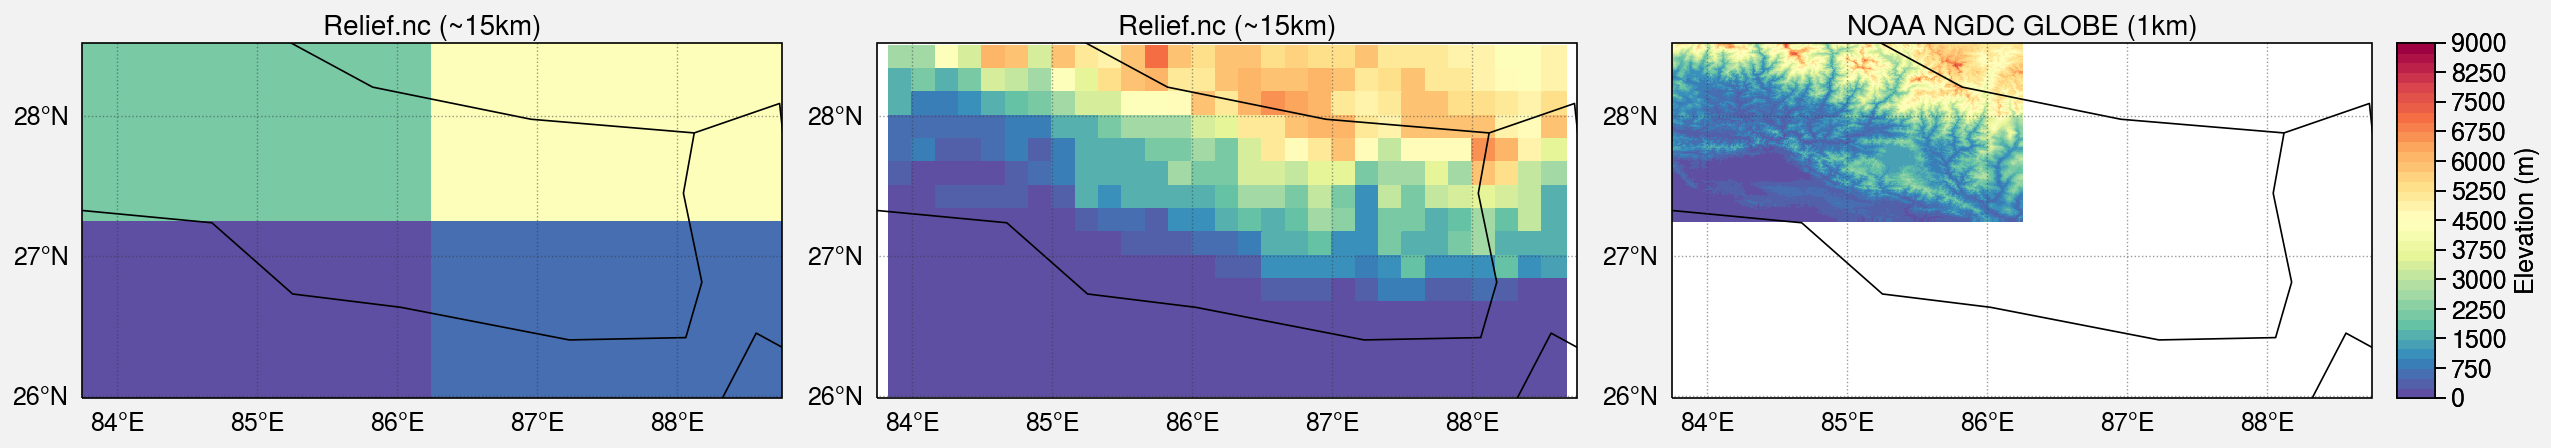

In [107]:
%matplotlib inline

f, axs = plot.subplots(proj='cyl', ncols=3, nrows=1, axwidth=3.5)

axs[0].pcolormesh(
    orog.sel(lat=slice(latlim_everest[0],latlim_everest[1]), lon=slice(lonlim_everest[0],lonlim_everest[1])),
#     colorbar='r',
    levels=plot.arange(0,9000,250),
    cmap='Spectral'
)
axs[0].format(title='orog_fx_IPSL-CM6A-LR (~150/250km)')

axs[1].pcolormesh(
    relief.sel(latitude=slice(latlim_everest[1],latlim_everest[0]), longitude=slice(lonlim_everest[0],lonlim_everest[1])),
#     colorbar='r',
    levels=plot.arange(0,9000,250),
    cmap='Spectral'
)
axs[1].format(title='Relief.nc (~15km)')

m = axs[2].pcolormesh(
    topo.sel(Y=slice(latlim_everest[1],latlim_everest[0]+dy), X=slice(lonlim_everest[0],lonlim_everest[1]-dx)),
#     colorbar='r',
    levels=plot.arange(0,9000,250),
    cmap='Spectral'
)
axs[2].format(title='NOAA NGDC GLOBE (1km)')

f.colorbar(m, label='Elevation (m)')

axs.format(
    geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, labels=True, 
    borders=True,
    lonlines=1, latlines=1, latlim=(latlim_everest[0],latlim_everest[1]), lonlim=(lonlim_everest[0],lonlim_everest[1])
)

### Generalize

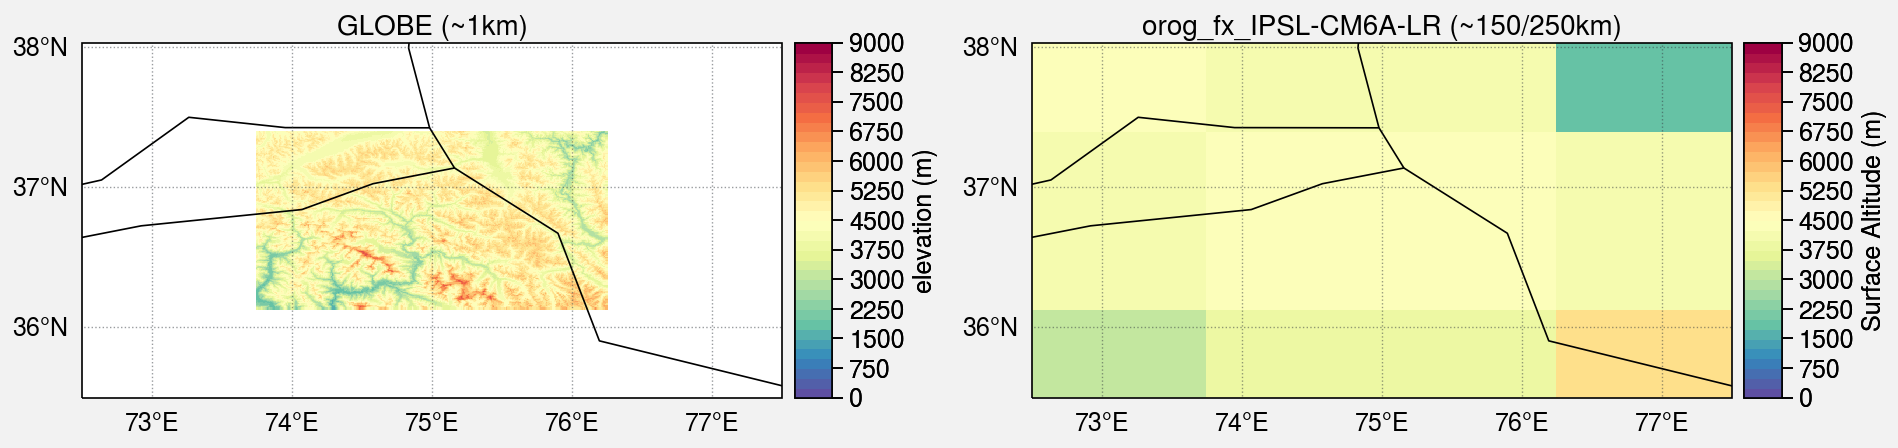

In [29]:
x,y = 30,100

dy=orog.lat[y+1].values-orog.lat[y].values
dx=orog.lon[x+1].values-orog.lon[x].values

f, axs = plot.subplots(proj='cyl', ncols=2, nrows=1, axwidth=3.5)

axs[0].pcolormesh(
    topo.sel(
            Y=slice(orog.isel(lat=y, lon=x).lat.values+dy/2, orog.isel(lat=y, lon=x).lat.values-dy/2), 
            X=slice(orog.isel(lat=y, lon=x).lon.values-dx/2, orog.isel(lat=y, lon=x).lon.values+dx/2)
        ),
    colorbar='r',
    levels=plot.arange(0,9000,250),
    cmap='Spectral'
)
axs[0].format(title='GLOBE (~1km)')

axs[1].pcolormesh(
    orog,
    colorbar='r',
    levels=plot.arange(0,9000,250),
    cmap='Spectral'
)
axs[1].format(title='orog_fx_IPSL-CM6A-LR (~150/250km)')

axs.format(
    geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, labels=True, 
    borders=True,
    lonlines=1, latlines=1, 
    latlim=(orog.isel(lat=y, lon=x).lat.values-dy, orog.isel(lat=y, lon=x).lat.values+dy), 
    lonlim=(orog.isel(lat=y, lon=x).lon.values-dx, orog.isel(lat=y, lon=x).lon.values+dx)
)

In [30]:
topo.sel(
            Y=slice(orog.isel(lat=y, lon=x).lat.values+dy/2, orog.isel(lat=y, lon=x).lat.values-dy/2), 
            X=slice(orog.isel(lat=y, lon=x).lon.values-dx/2, orog.isel(lat=y, lon=x).lon.values+dx/2)
        ).mean().values

array(4532.815, dtype=float32)

### Test on 9 pixels

In [31]:
mean_topo = orog.copy()
std_topo = orog.copy()

for y in range(99,102):
    print(y)
    for x in range(29,32):
        if x < orog.lon.size-1: # keep the last value for last longitude
            dy=orog.lat[y+1].values-orog.lat[y].values
            dx=orog.lon[x+1].values-orog.lon[x].values
        
        mean_topo[y,x] = topo.sel(
            Y=slice(orog.isel(lat=y, lon=x).lat.values+dy/2, orog.isel(lat=y, lon=x).lat.values-dy/2), 
            X=slice(orog.isel(lat=y, lon=x).lon.values-dx/2, orog.isel(lat=y, lon=x).lon.values+dx/2)
        ).mean().values
        
        std_topo[y,x] = topo.sel(
            Y=slice(orog.isel(lat=y, lon=x).lat.values+dy/2, orog.isel(lat=y, lon=x).lat.values-dy/2), 
            X=slice(orog.isel(lat=y, lon=x).lon.values-dx/2, orog.isel(lat=y, lon=x).lon.values+dx/2)
        ).std().values

99
100
101


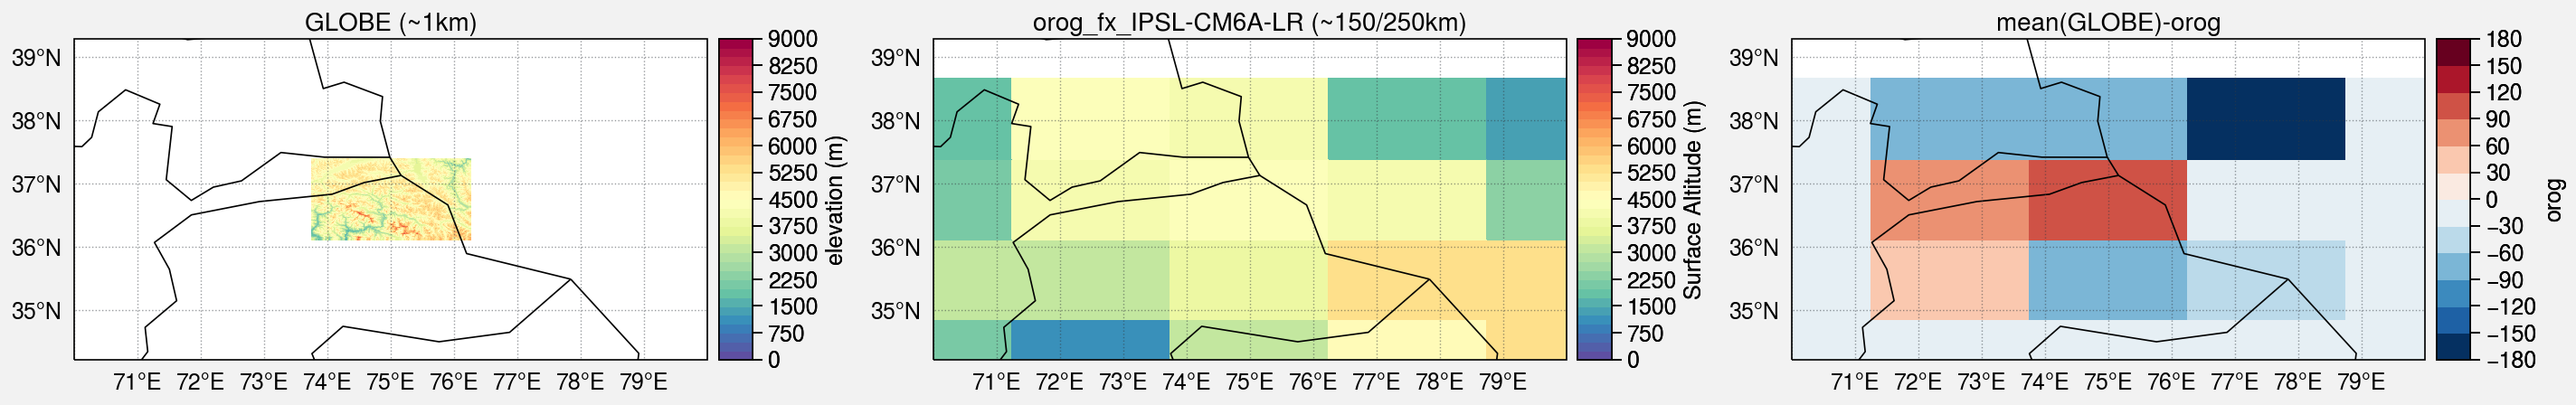

In [37]:
x,y = 30,100

dy=orog.lat[y+1].values-orog.lat[y].values
dx=orog.lon[x+1].values-orog.lon[x].values

f, axs = plot.subplots(proj='cyl', ncols=3, nrows=1, axwidth=3.5)

axs[0].pcolormesh(
    topo.sel(
            Y=slice(orog.isel(lat=y, lon=x).lat.values+dy/2, orog.isel(lat=y, lon=x).lat.values-dy/2), 
            X=slice(orog.isel(lat=y, lon=x).lon.values-dx/2, orog.isel(lat=y, lon=x).lon.values+dx/2)
        ),
    colorbar='r',
    levels=plot.arange(0,9000,250),
    cmap='Spectral'
)
axs[0].format(title='GLOBE (~1km)')

axs[1].pcolormesh(
    orog.sel(
        lat=slice(orog.isel(lat=y, lon=x).lat.values-dy*2, orog.isel(lat=y, lon=x).lat.values+dy*2),
        lon=slice(orog.isel(lat=y, lon=x).lon.values-dx*2, orog.isel(lat=y, lon=x).lon.values+dx*2)
    ),
    colorbar='r',
    levels=plot.arange(0,9000,250),
    cmap='Spectral'
)
axs[1].format(title='orog_fx_IPSL-CM6A-LR (~150/250km)')

axs[2].pcolormesh(
#     mean_topo.sel(
#         lat=slice(orog.isel(lat=y, lon=x).lat.values-dy*2, orog.isel(lat=y, lon=x).lat.values+dy*2),
#         lon=slice(orog.isel(lat=y, lon=x).lon.values-dx*2, orog.isel(lat=y, lon=x).lon.values+dx*2)
#     ),
    mean_topo.sel(
        lat=slice(orog.isel(lat=y, lon=x).lat.values-dy*2, orog.isel(lat=y, lon=x).lat.values+dy*2),
        lon=slice(orog.isel(lat=y, lon=x).lon.values-dx*2, orog.isel(lat=y, lon=x).lon.values+dx*2)
    ) - orog.sel(
        lat=slice(orog.isel(lat=y, lon=x).lat.values-dy*2, orog.isel(lat=y, lon=x).lat.values+dy*2),
        lon=slice(orog.isel(lat=y, lon=x).lon.values-dx*2, orog.isel(lat=y, lon=x).lon.values+dx*2)
    ),
    colorbar='r',
#     levels=plot.arange(0,9000,250),
    cmap='RdBu_r',
    symmetric=True
)
axs[2].format(title='mean(GLOBE)-orog')

axs.format(
    geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, labels=True, 
    borders=True,
    lonlines=1, latlines=1, 
    latlim=(orog.isel(lat=y, lon=x).lat.values-dy*2, orog.isel(lat=y, lon=x).lat.values+dy*2), 
    lonlim=(orog.isel(lat=y, lon=x).lon.values-dx*2, orog.isel(lat=y, lon=x).lon.values+dx*2)
)

# -------------------------------------------------------------------------------------------------------------
# Computation of mean and std from GLOBE (1km) in each grid cell of orog_fx_IPSL-CM6A-LR (~150/250km)
# -------------------------------------------------------------------------------------------------------------
-> long computation to save and load

In [5]:
# Because orog have 0 for oceans
# However I don't know how to deal with the coast... for now average
topo_0 = topo.fillna(0) 

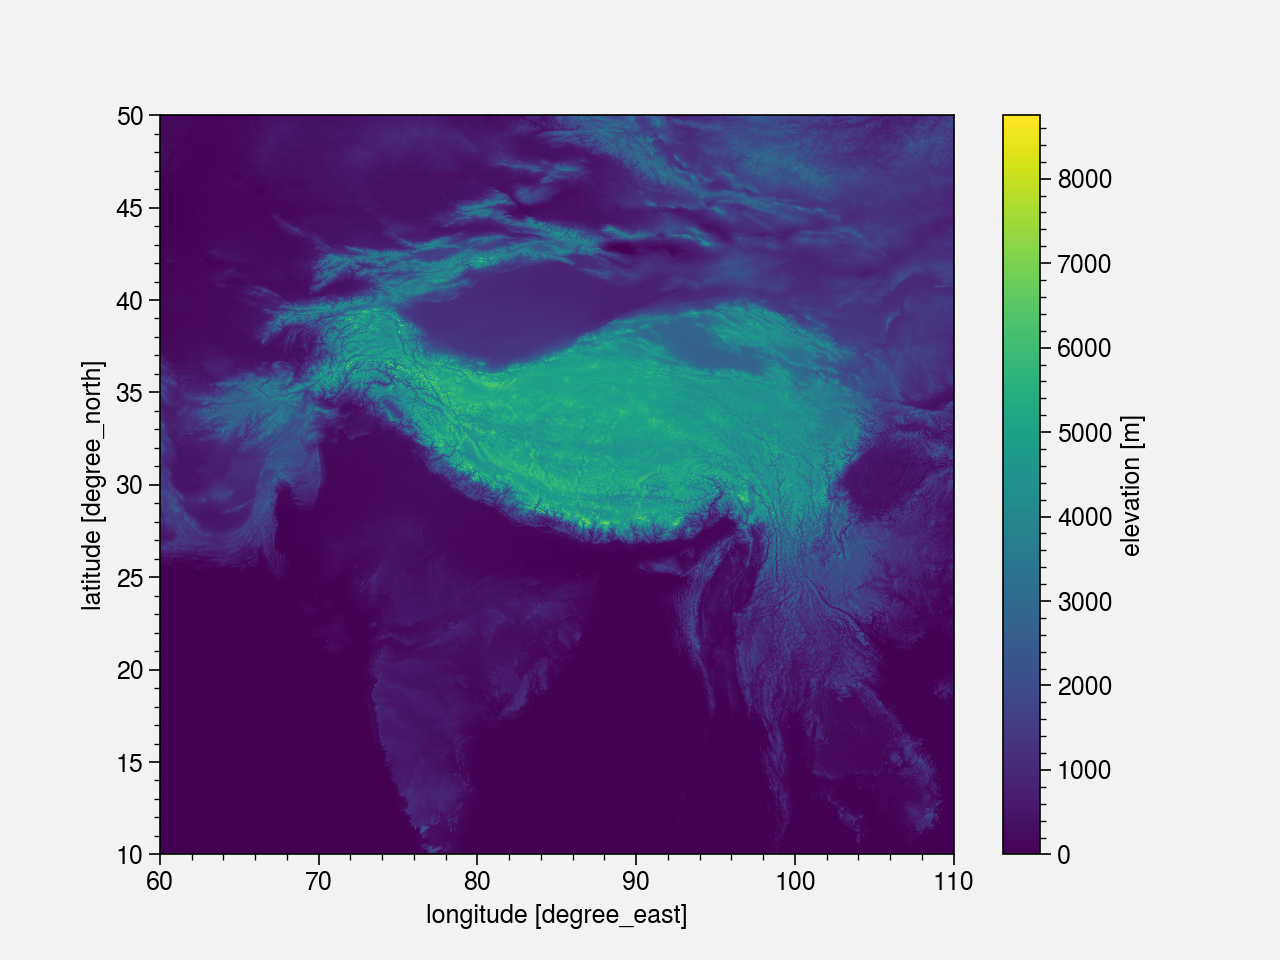

In [81]:
topo_0.sel(Y=slice(50,10), X=slice(60,110)).plot()

In [13]:
# Because orog have 0 for oceans
# However I don't know how to deal with the coast... for now average
# topo_0 = topo.fillna(0) 

mean_topo = orog.copy()
std_topo = orog.copy()

# for y in range(1):
for y in range(orog.lat.size):
    print(y)
    for x in range(orog.lon.size):
        if y < orog.lat.size-1: # keep the last value for last longitude/latitude
            dy = orog.lat[y+1].values-orog.lat[y].values
        if x < orog.lon.size-1:
            dx = orog.lon[x+1].values-orog.lon[x].values
            
            lat = orog.isel(lat=y, lon=x).lat.values
            lon = orog.isel(lat=y, lon=x).lon.values
            if lon > 180: # Because GLOBE [-180:180] and orog [0:360]
                lon-=360
        
        mean_topo[y,x] = topo_0.sel(
            Y=slice(lat+dy/2, lat-dy/2), X=slice(lon-dx/2, lon+dx/2)
        ).mean().values
        
        std_topo[y,x] = topo_0.sel(
            Y=slice(lat+dy/2, lat-dy/2), X=slice(lon-dx/2, lon+dx/2)
        ).std().values

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142


In [15]:
mean_topo.to_netcdf('mean_topo.nc')
std_topo.to_netcdf('std_topo.nc')

In [11]:
mean_topo = xr.open_dataarray('mean_topo.nc')
std_topo = xr.open_dataarray('std_topo.nc')

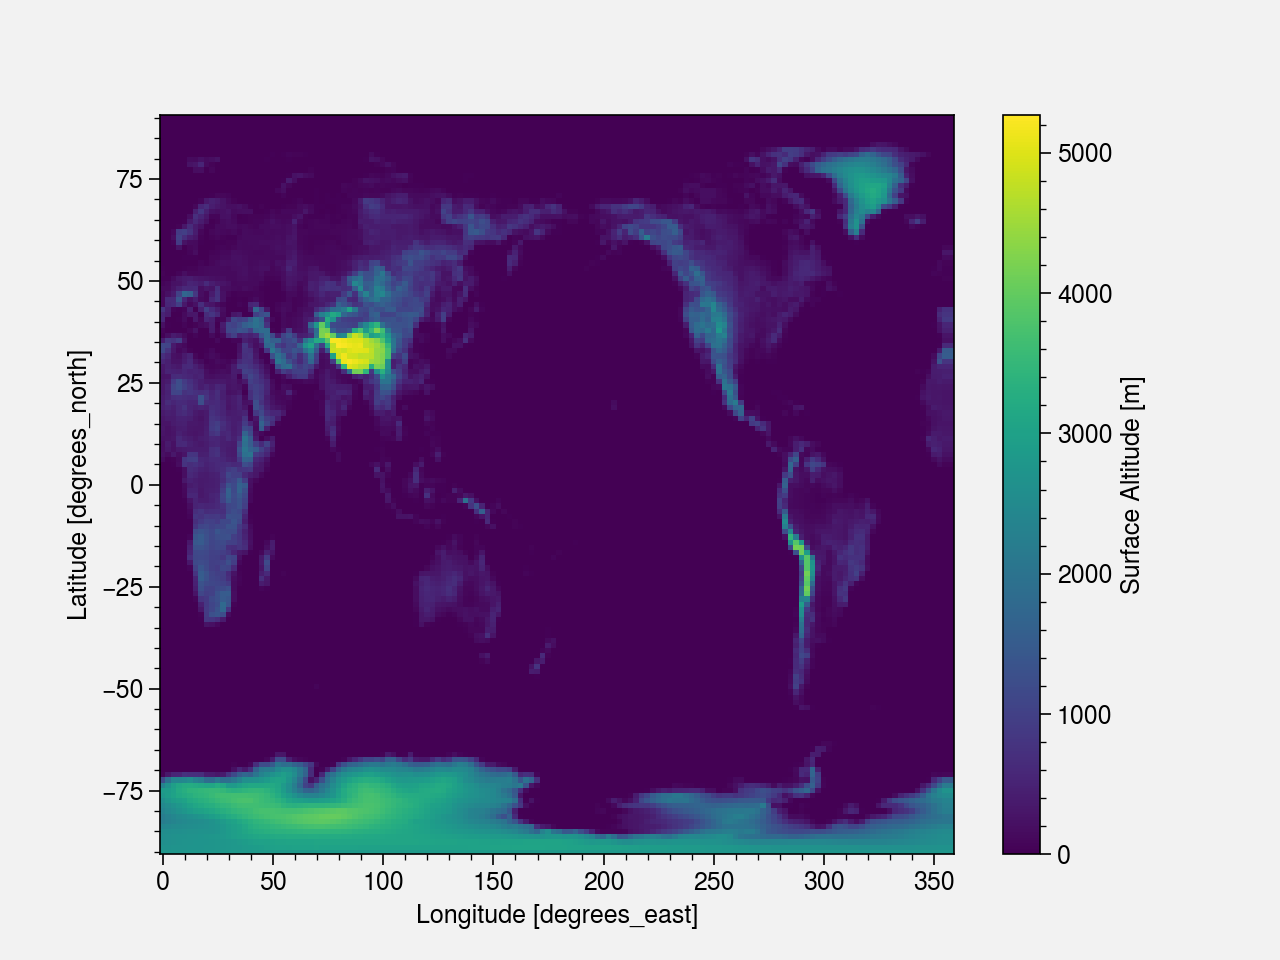

In [4]:
mean_topo.plot()

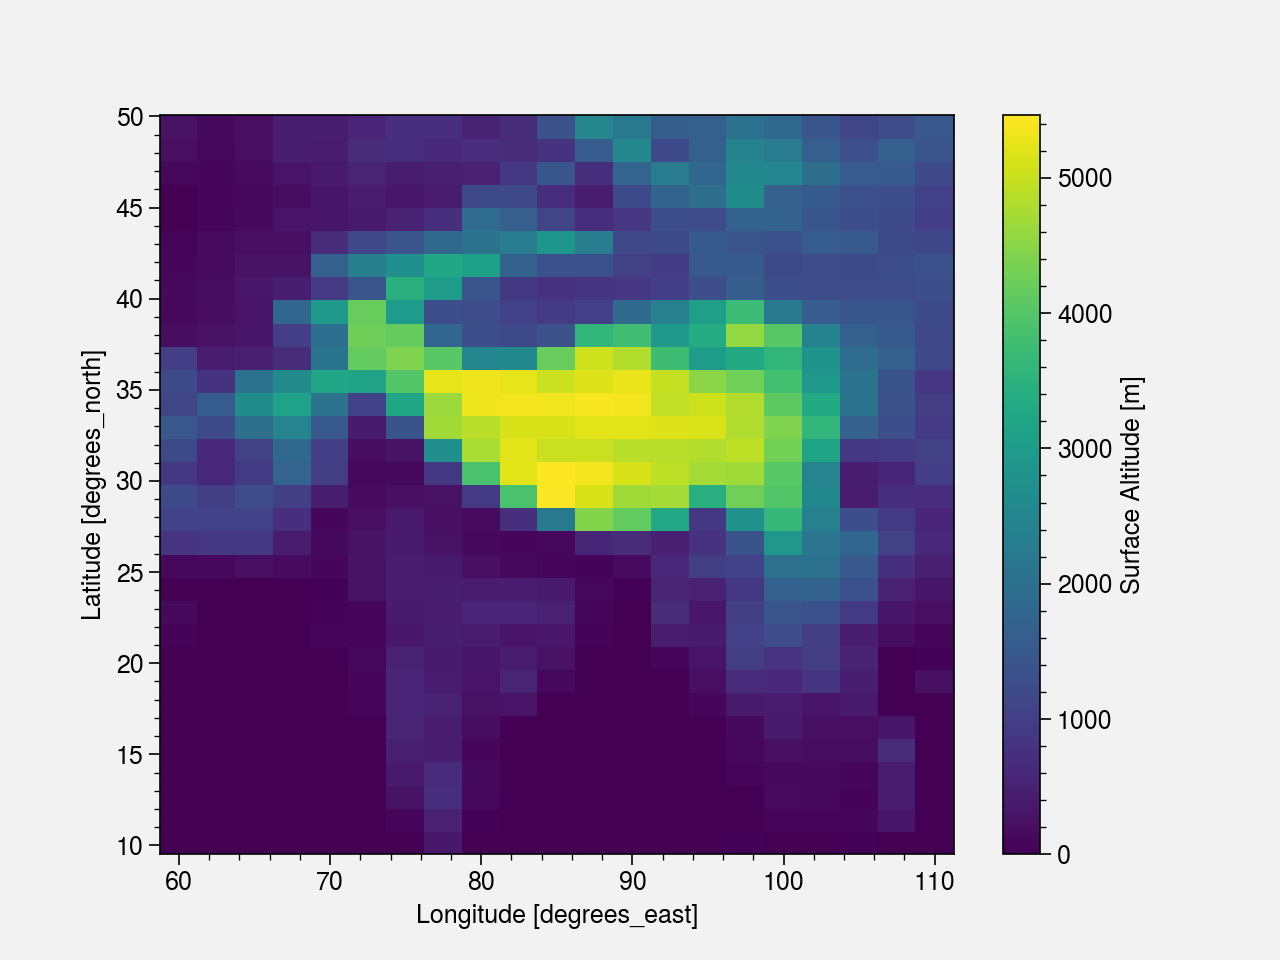

In [16]:
orog.sel(lat=slice(10,50), lon=slice(60,110)).plot()

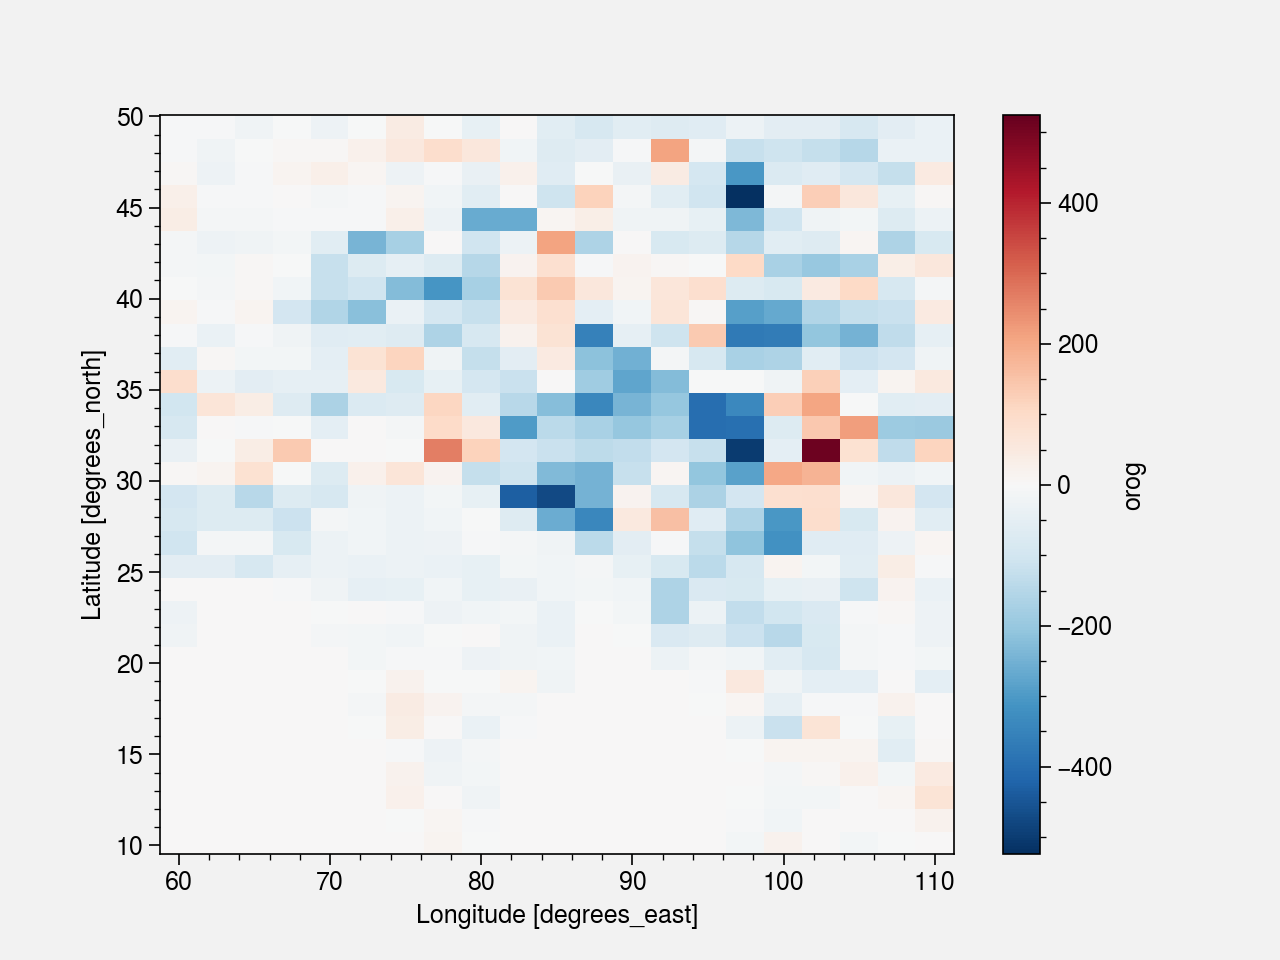

In [17]:
(mean_topo - orog).sel(lat=slice(10,50), lon=slice(60,110)).plot()

In [6]:
latlim=(10,50)
lonlim=(60,110)

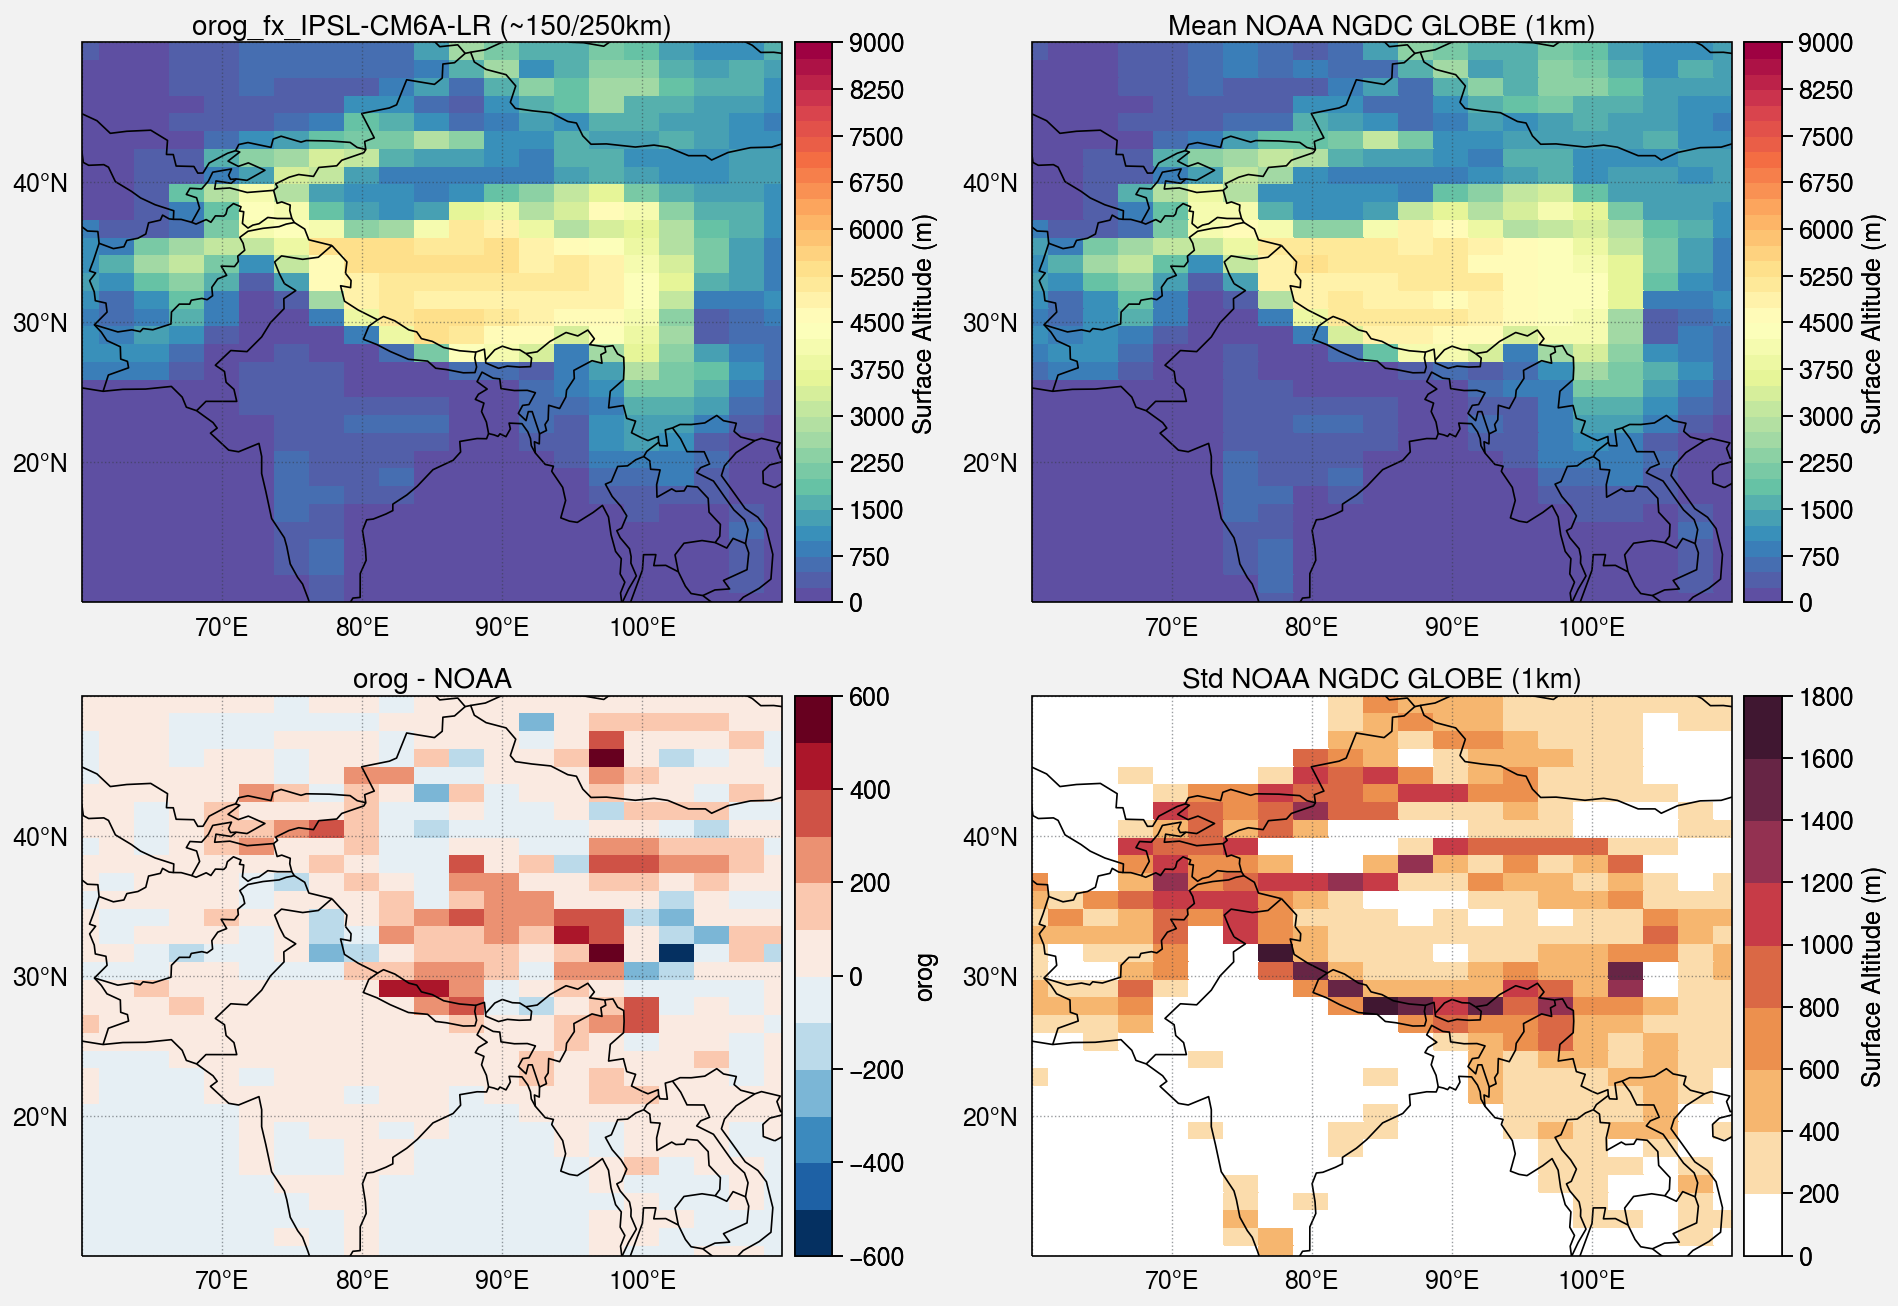

In [13]:
%matplotlib inline

latlim=(10,50)
lonlim=(60,110)

f, axs = plot.subplots(proj='cyl', ncols=2, nrows=2, axwidth=3.5)

axs[0].pcolormesh(
    orog.sel(lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1])),
    colorbar='r',
    levels=plot.arange(0,9000,250),
    cmap='Spectral'
)
axs[0].format(title='orog_fx_IPSL-CM6A-LR (~150/250km)')

axs[1].pcolormesh(
    mean_topo.sel(lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1])),
    colorbar='r',
    levels=plot.arange(0,9000,250),
    cmap='Spectral'
)
axs[1].format(title='Mean NOAA NGDC GLOBE (1km)')

m = axs[2].pcolormesh(
    (orog-mean_topo).sel(lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1])),
    colorbar='r',
#     levels=plot.arange(0,9000,250),
    cmap='BuRd'
)
axs[2].format(title='orog - NOAA')

m = axs[3].pcolormesh(
    std_topo.sel(lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1])),
    colorbar='r',
#     levels=plot.arange(0,9000,250),
#     cmap='BuRd'
)
axs[3].format(title='Std NOAA NGDC GLOBE (1km)')

# f.colorbar(m, label='Elevation (m)')

axs.format(
    geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, labels=True, 
    borders=True, coast=True,
    lonlines=10, latlines=10, latlim=(latlim[0],latlim[1]), lonlim=(lonlim[0],lonlim[1])
)

f.savefig("img/elevation_mean_std_bias.png")

## Load model data

In [8]:
# Define period
period = slice('1981','2014')

In the next cells the `chunks={'time': 120}` allows not to load full data set but take it by chunks of 10 years. This allows to parallelize the computation and/or make fit into the memory (see **xarray/dask**: http://xarray.pydata.org/en/stable/dask.html)

In [9]:
# Load historical
snc_historical = xr.open_mfdataset(
    '/bdd/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r1i1p1f1/LImon/snc/gr/latest/*.nc', combine='by_coords'
).sel(time=period).snc

# Load amip
snc_amip = xr.open_mfdataset(
    '/bdd/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/amip/r1i1p1f1/LImon/snc/gr/latest/*.nc', combine='by_coords'
).sel(time=period).snc

# Load land-hist
snc_land_hist = xr.open_mfdataset(
    '/bdd/CMIP6/LS3MIP/IPSL/IPSL-CM6A-LR/land-hist/r1i1p1f1/LImon/snc/gr/latest/*.nc', combine='by_coords'
).sel(time=period).snc

In [10]:
# Load HighResMIP
snc_HR = xr.open_mfdataset(
    '/bdd/CMIP6/HighResMIP/IPSL/IPSL-CM6A-ATM-HR/highresSST-present/r1i1p1f1/LImon/snc/gr/latest/*.nc', combine='by_coords'
).sel(time=period).snc
snc_HR

<xarray.DataArray 'snc' (time: 408, lat: 361, lon: 512)>
dask.array<getitem, shape=(408, 361, 512), dtype=float32, chunksize=(408, 361, 512), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float32 0.0 0.703125 1.40625 ... 358.59375 359.29688
  * time     (time) datetime64[ns] 1981-01-16T12:00:00 ... 2014-12-16T12:00:00
Attributes:
    long_name:           Snow Area Fraction
    units:               %
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 month
    standard_name:       surface_snow_area_fraction
    description:         Fraction of each grid cell that is occupied by snow ...
    history:             none
    cell_measures:       area: areacella

## Load Rutger University data set

In [11]:
ds_rutger = xr.open_dataset('/data/mlalande/RUTGERS/nhsce_v01r01_19661004_20191202.nc').sel(time=period)

### Get the snc variable, keep only land data, convert to % and resample by months
Resampling with xarray: http://xarray.pydata.org/en/stable/generated/xarray.Dataset.resample.html  
**Offset aliases**: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases  
Here we use: **MS**	month start frequency

In [12]:
# Get the snc variable, keep only land data and convert to %
with xr.set_options(keep_attrs=True):
    snc_rutger = ds_rutger.snow_cover_extent.where(ds_rutger.land == 1)*100
    
snc_rutger.attrs['units'] = '%'

# Rename lon and lat for the regrid
snc_rutger = snc_rutger.rename({'longitude': 'lon', 'latitude': 'lat'})

# Resamble data per month (from per week)
snc_rutger = snc_rutger.resample(time='1MS').mean('time', skipna='False', keep_attrs=True)
snc_rutger

/home/mlalande/miniconda3/lib/python3.7/site-packages/xarray/core/resample.py:176: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  super().__init__(*args, **kwargs)
/home/mlalande/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray 'snow_cover_extent' (time: 408, rows: 88, cols: 88)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time                  (time) datetime64[ns] 1981-01-01 ... 2014-12-01
    snow_cover_threshold  float32 0.42
    lat                   (rows, cols) float64 0.6592 1.322 ... 1.322 0.6592
    lon                   (rows, cols) float64 145.0 144.3 ... -35.67 -35.0
Dimensions without coordinates: rows, cols
Attributes:
    long_name:      NOAA/NCDC Climate Data Record of snow cover extent
    standard_name:  surface_snow_binary_mask
    grid_mapping:   coord_system
    valid_range:    [0 1]
    flag_values:    [0 1]
    flag_meanings:  no_snow snow_covered
    units:          %

### Regrid using xESMF (https://xesmf.readthedocs.io/en/latest/)
Value of cells in the new grid that are outside the old grid's domain #15 (https://github.com/JiaweiZhuang/xESMF/issues/15)

In [13]:
# For adding NaN values outside of the grid, otherwise it puts 0 (see issue just up #15)
import scipy
def add_matrix_NaNs(regridder):
    X = regridder.weights
    M = scipy.sparse.csr_matrix(X)
    num_nonzeros = np.diff(M.indptr)
    M[num_nonzeros == 0, 0] = np.NaN
    regridder.weights = scipy.sparse.coo_matrix(M)
    return regridder

# Make the regrider
regridder = xe.Regridder(snc_rutger, snc_historical, 'bilinear', periodic=False)
regridder = add_matrix_NaNs(regridder)
print(regridder)

# Regrid the data
snc_rutger_regrid = regridder(snc_rutger)

Overwrite existing file: bilinear_88x88_143x144.nc 
 You can set reuse_weights=True to save computing time.


/home/mlalande/miniconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_88x88_143x144.nc 
Reuse pre-computed weights? False 
Input grid shape:           (88, 88) 
Output grid shape:          (143, 144) 
Output grid dimension name: ('lat', 'lon') 
Periodic in longitude?      False


Text(0.5, 1.0, 'IPSL_CM6A_LR grid 143x144')

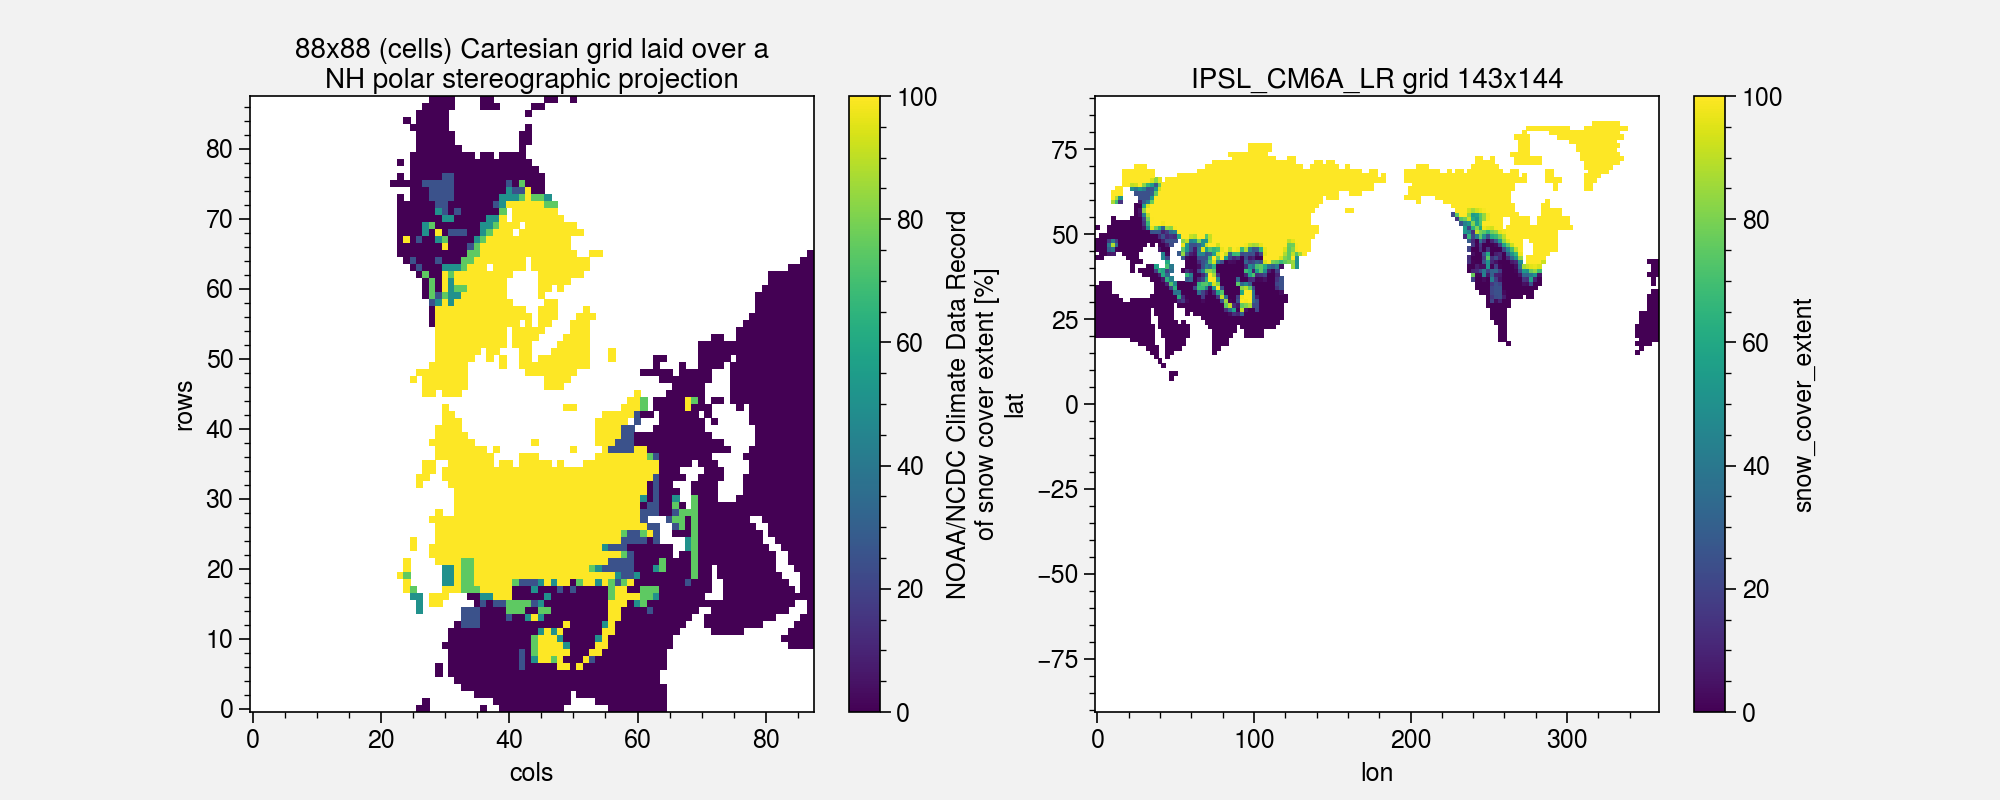

In [14]:
plt.figure(figsize=(10,4))
plt.subplot(121)
snc_rutger[0].plot()
plt.title('88x88 (cells) Cartesian grid laid over a\nNH polar stereographic projection')
plt.subplot(122)
snc_rutger_regrid[0].plot()
plt.title('IPSL_CM6A_LR grid 143x144')

In [15]:
# Regrid HighResMIP
regridder = xe.Regridder(snc_HR, snc_historical, 'bilinear', periodic=True)
regridder

Overwrite existing file: bilinear_361x512_143x144_peri.nc 
 You can set reuse_weights=True to save computing time.


xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_361x512_143x144_peri.nc 
Reuse pre-computed weights? False 
Input grid shape:           (361, 512) 
Output grid shape:          (143, 144) 
Output grid dimension name: ('lat', 'lon') 
Periodic in longitude?      True

In [16]:
# Regrid the data
snc_HR_regrid = regridder(snc_HR)

## Climatology

In [17]:
snc_historical_clim = u.clim(snc_historical)
snc_historical_clim.load()

snc_amip_clim = u.clim(snc_amip)
snc_amip_clim.load()

snc_land_hist_clim = u.clim(snc_land_hist)
snc_land_hist_clim.load()

snc_rutger_regrid_clim = u.clim(snc_rutger_regrid)
snc_rutger_regrid_clim.load()

snc_HR_regrid_clim = u.clim(snc_HR_regrid)
snc_HR_regrid_clim.load()

<xarray.DataArray (lat: 143, lon: 144)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 -90.0 -88.73239 -87.46479 ... 87.46479 88.73239 90.0
Attributes:
    regrid_method:  bilinear

In [18]:
latlim=(10,50)
lonlim=(60,110)

bias = xr.concat(
    [
        snc_historical_clim-snc_rutger_regrid_clim,
        snc_amip_clim-snc_rutger_regrid_clim,
        snc_land_hist_clim-snc_rutger_regrid_clim,
        snc_HR_regrid_clim-snc_rutger_regrid_clim
    ],
    pd.Index(
        [
            'Historical (143x144) - NOAA CDR (88x88 NH)',
            'AMIP (143x144) - NOAA CDR (88x88 NH)',
            'land-hist (143x144) - NOAA CDR (88x88 NH)',
            'HR (361x512) - NOAA CDR (88x88 NH)'
        ], 
        name='bias'
    )
).sel(lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1]))

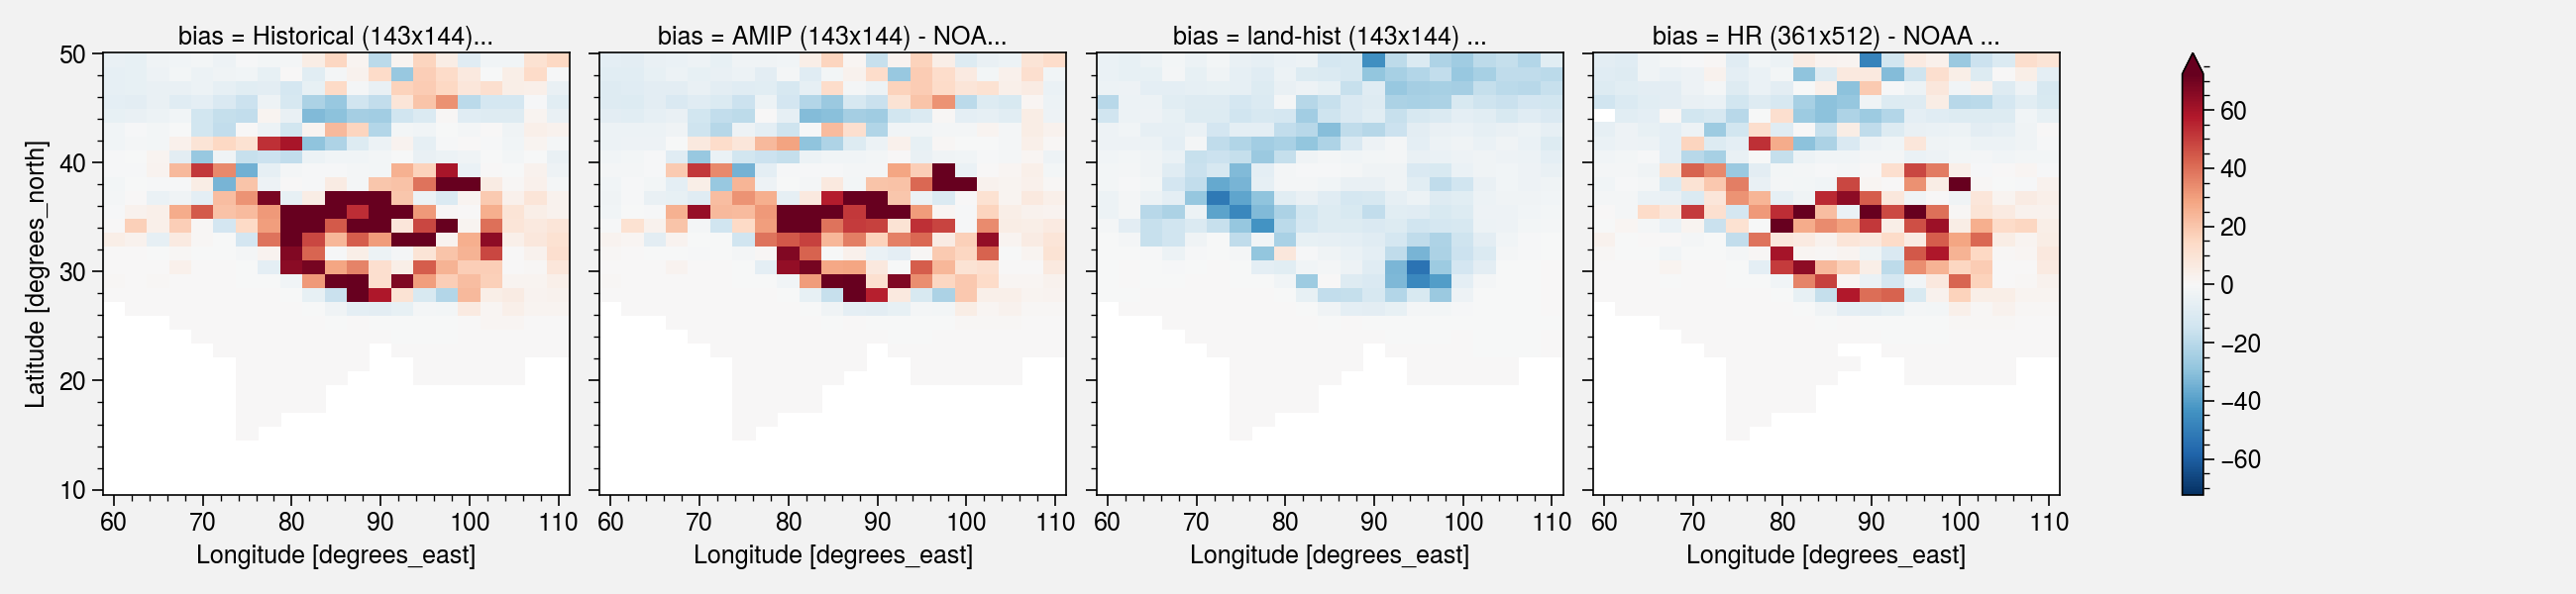

In [19]:
bias.plot(col='bias', robust=True)

In [14]:
bias.max()

<xarray.DataArray ()>
array(90.76925091)
Coordinates:
    snow_cover_threshold  float32 0.42

In [15]:
bias.min()

<xarray.DataArray ()>
array(-53.33603593)
Coordinates:
    snow_cover_threshold  float32 0.42

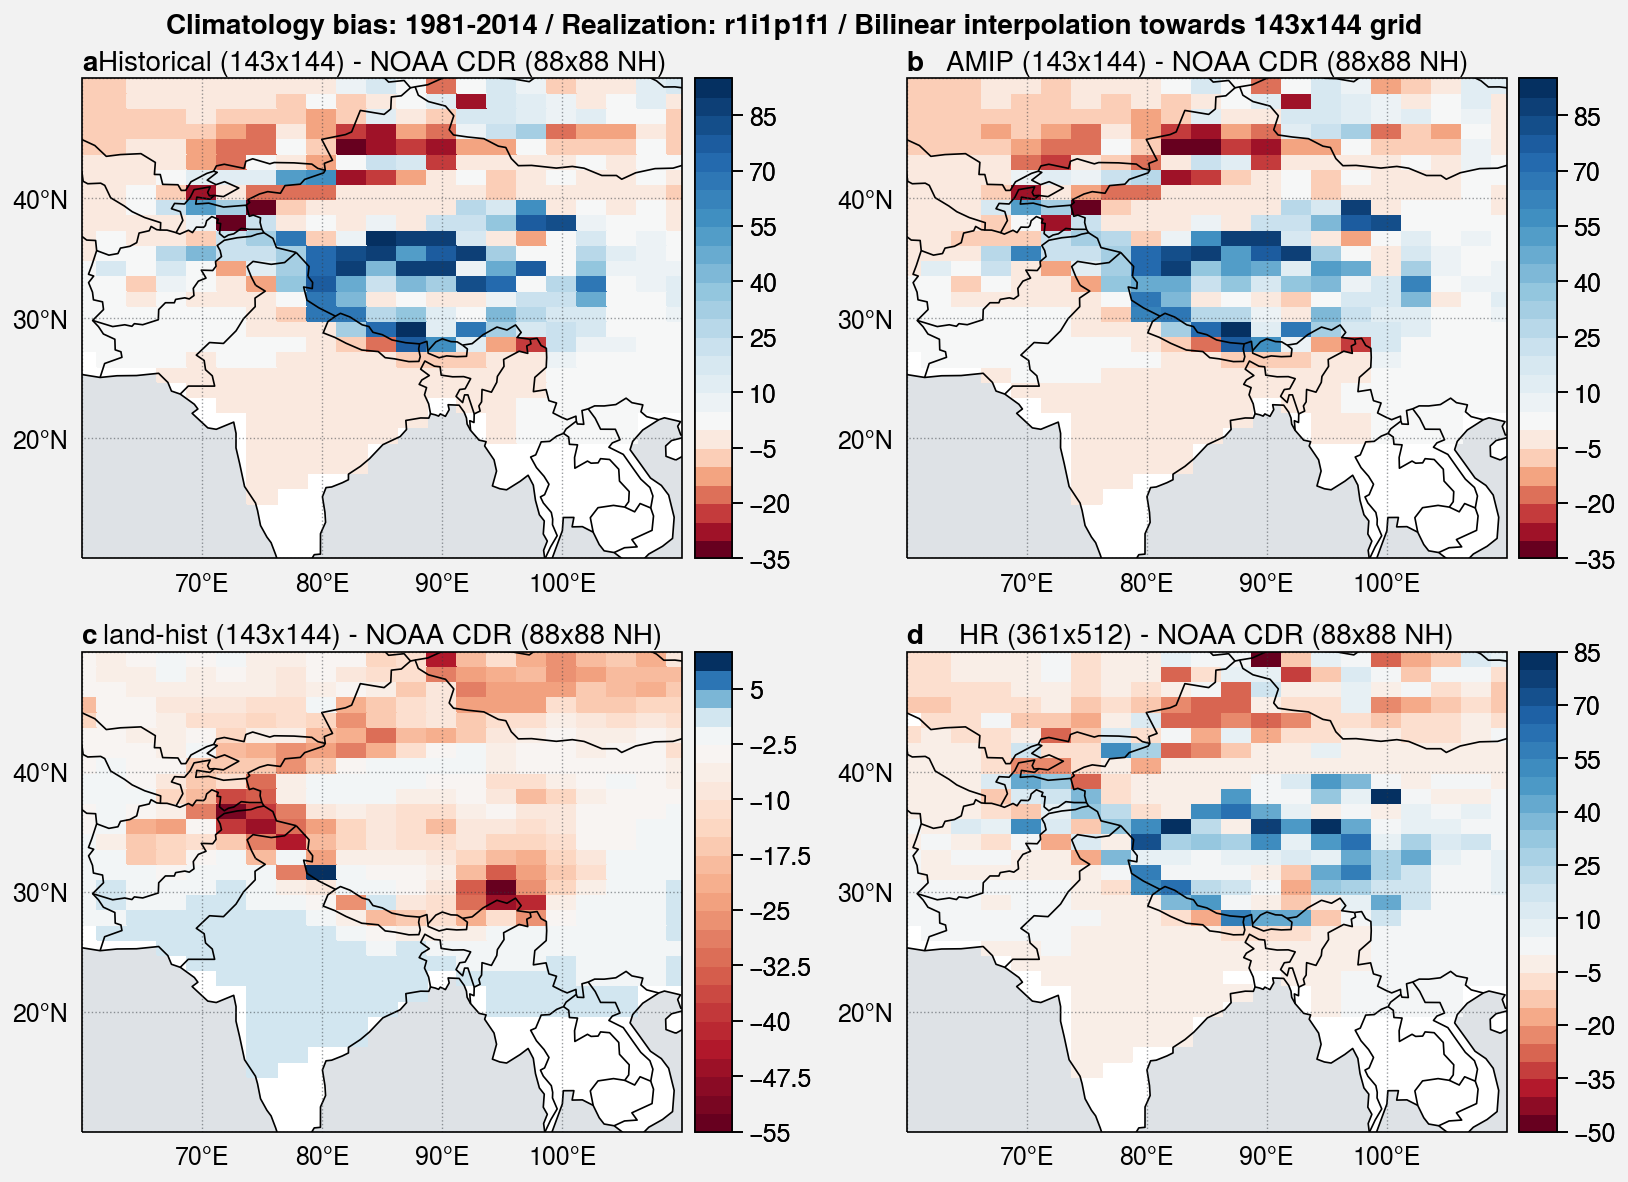

In [32]:
# Check colorbars extent

f, axs = plot.subplots(proj='cyl', ncols=2, nrows=2, share=3, axwidth=3)

for i, ax in enumerate(axs):
    m = ax.pcolormesh(
        bias.isel(bias=i), 
        cmap='RdBu',  
        colorbar='r',
        norm='midpoint',
        levels=30
    )
    ax.format(title=str(bias.isel(bias=i).bias.values))

axs.format(
    geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, labels=True, 
    coast=True, ocean=True, oceancolor='gray3', borders=True,
    suptitle="Climatology bias: 1981-2014 / Realization: r1i1p1f1 / Bilinear interpolation towards 143x144 grid",
    lonlines=10, latlines=10, abc=True, latlim=latlim, lonlim=lonlim
)

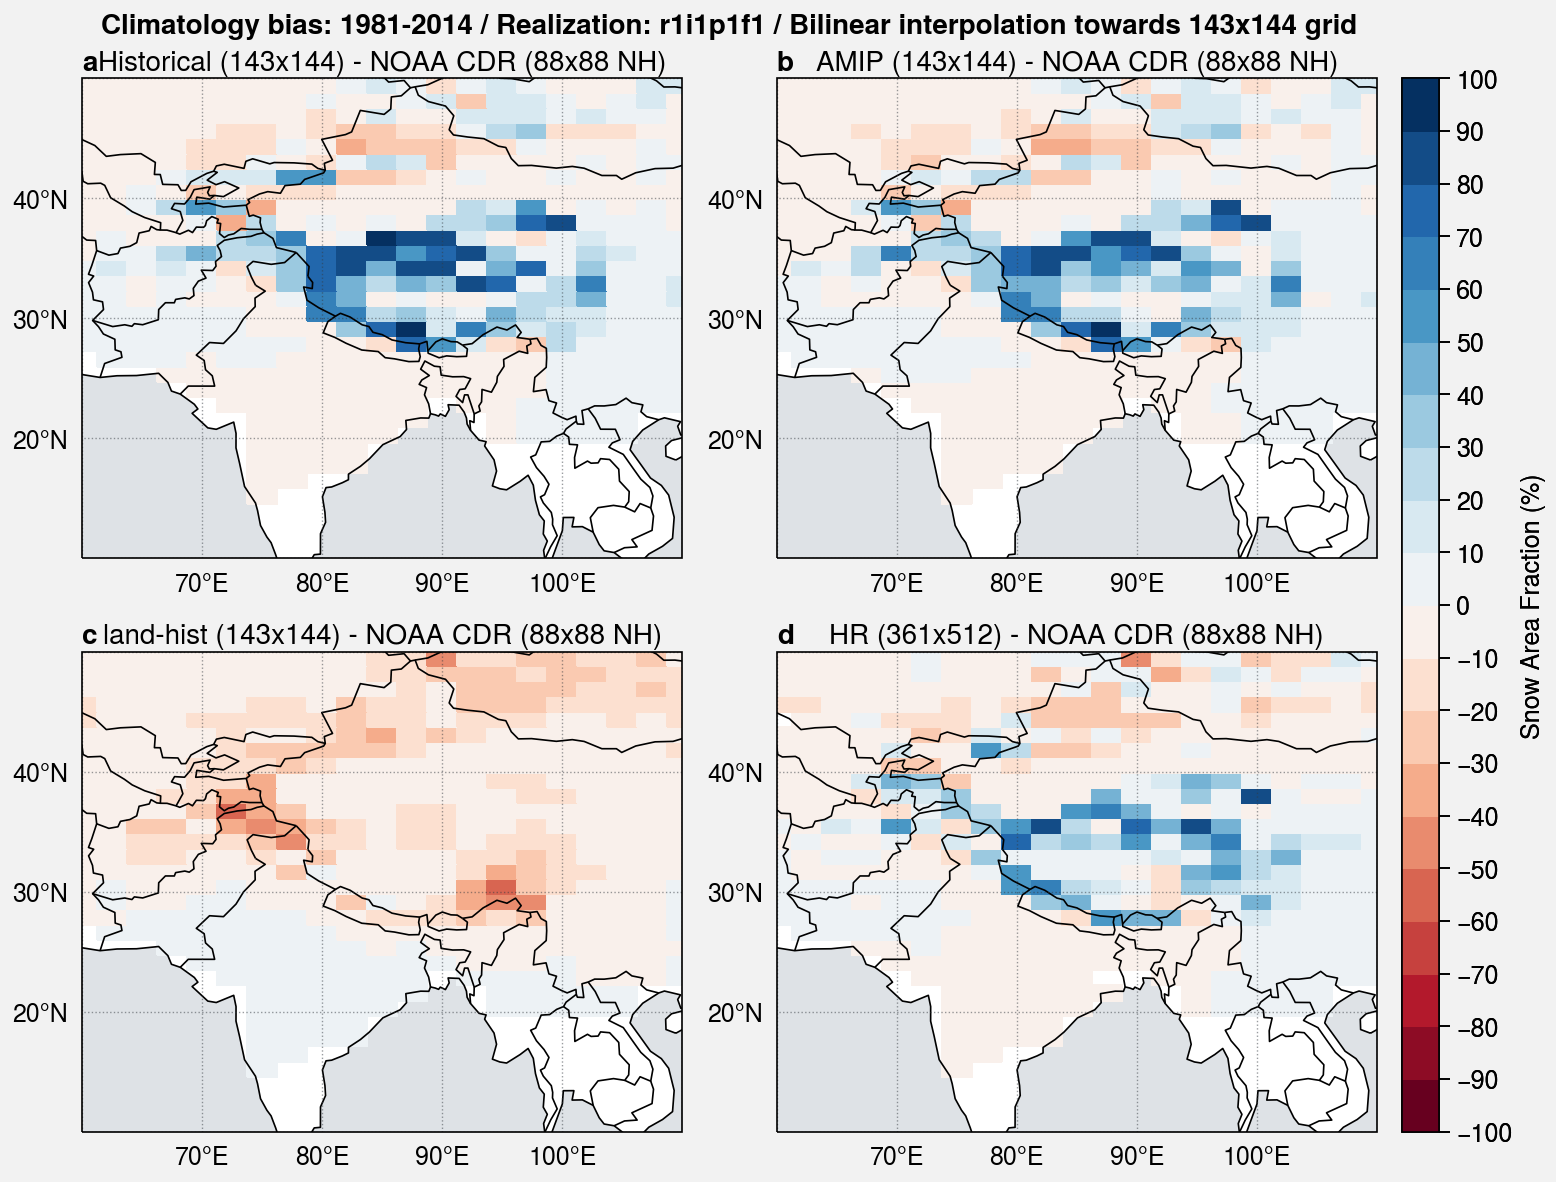

In [20]:
# Final plot

f, axs = plot.subplots(proj='cyl', ncols=2, nrows=2, share=3, axwidth=3)

for i, ax in enumerate(axs):
    m = ax.pcolormesh(
        bias.isel(bias=i), 
        cmap='RdBu', 
        levels=plot.arange(-100,100,10), 
    #     extend='both',
#         norm='midpoint'
    )
    ax.format(title=str(bias.isel(bias=i).bias.values))

f.colorbar(m, label='Snow Area Fraction (%)')

axs.format(
    geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, labels=True, 
    coast=True, ocean=True, oceancolor='gray3', borders=True,
    suptitle="Climatology bias: 1981-2014 / Realization: r1i1p1f1 / Bilinear interpolation towards 143x144 grid",
    lonlines=10, latlines=10, abc=True, latlim=latlim, lonlim=lonlim
)

# f.save('img/snow_cover_IPSL_CMIP6_bias.pdf')

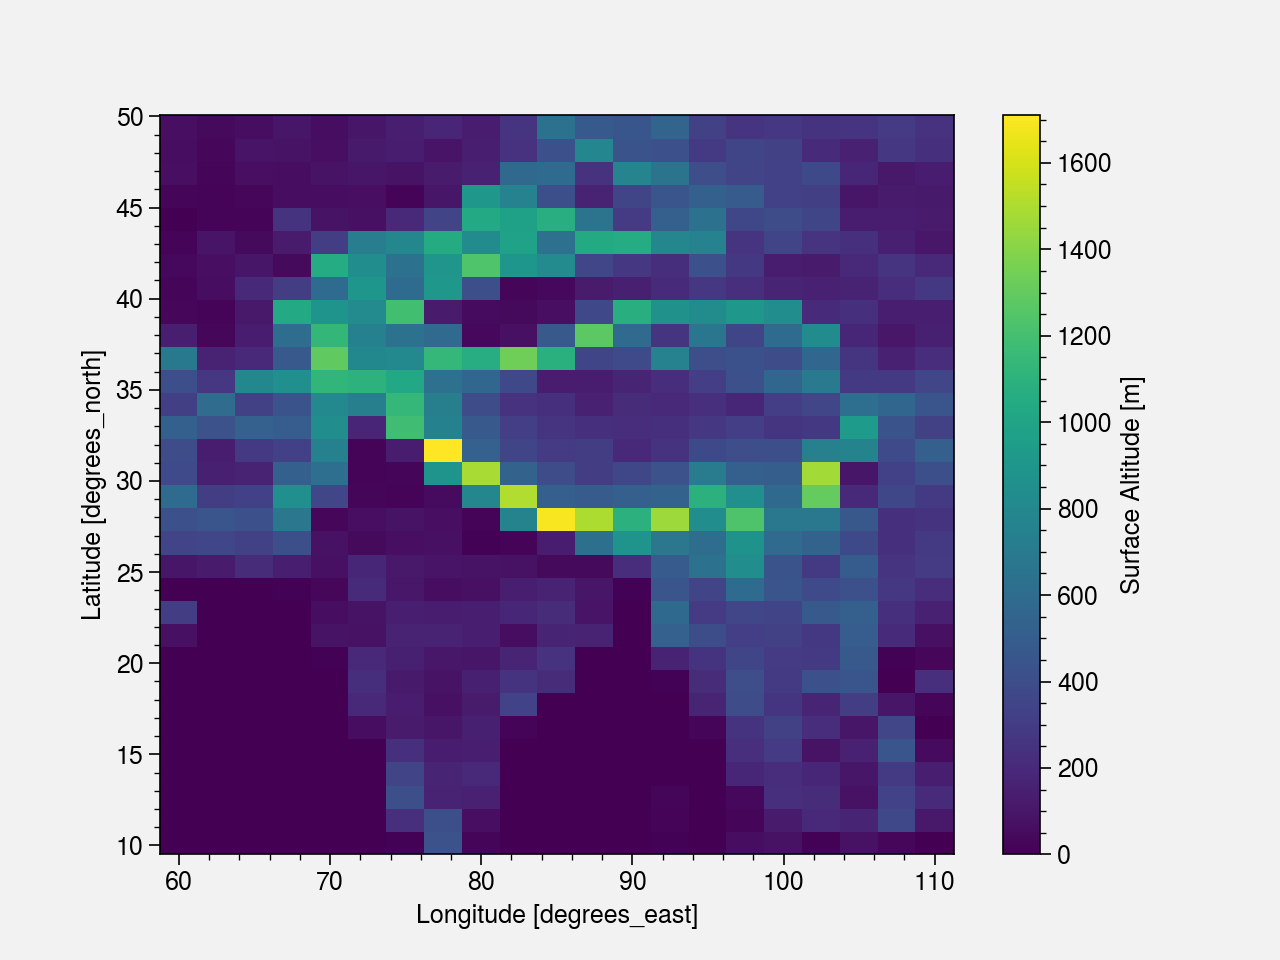

In [47]:
std_topo.sel(lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1])).plot()

# Link with orography?

## Problem of some grid cell that stays at 100%

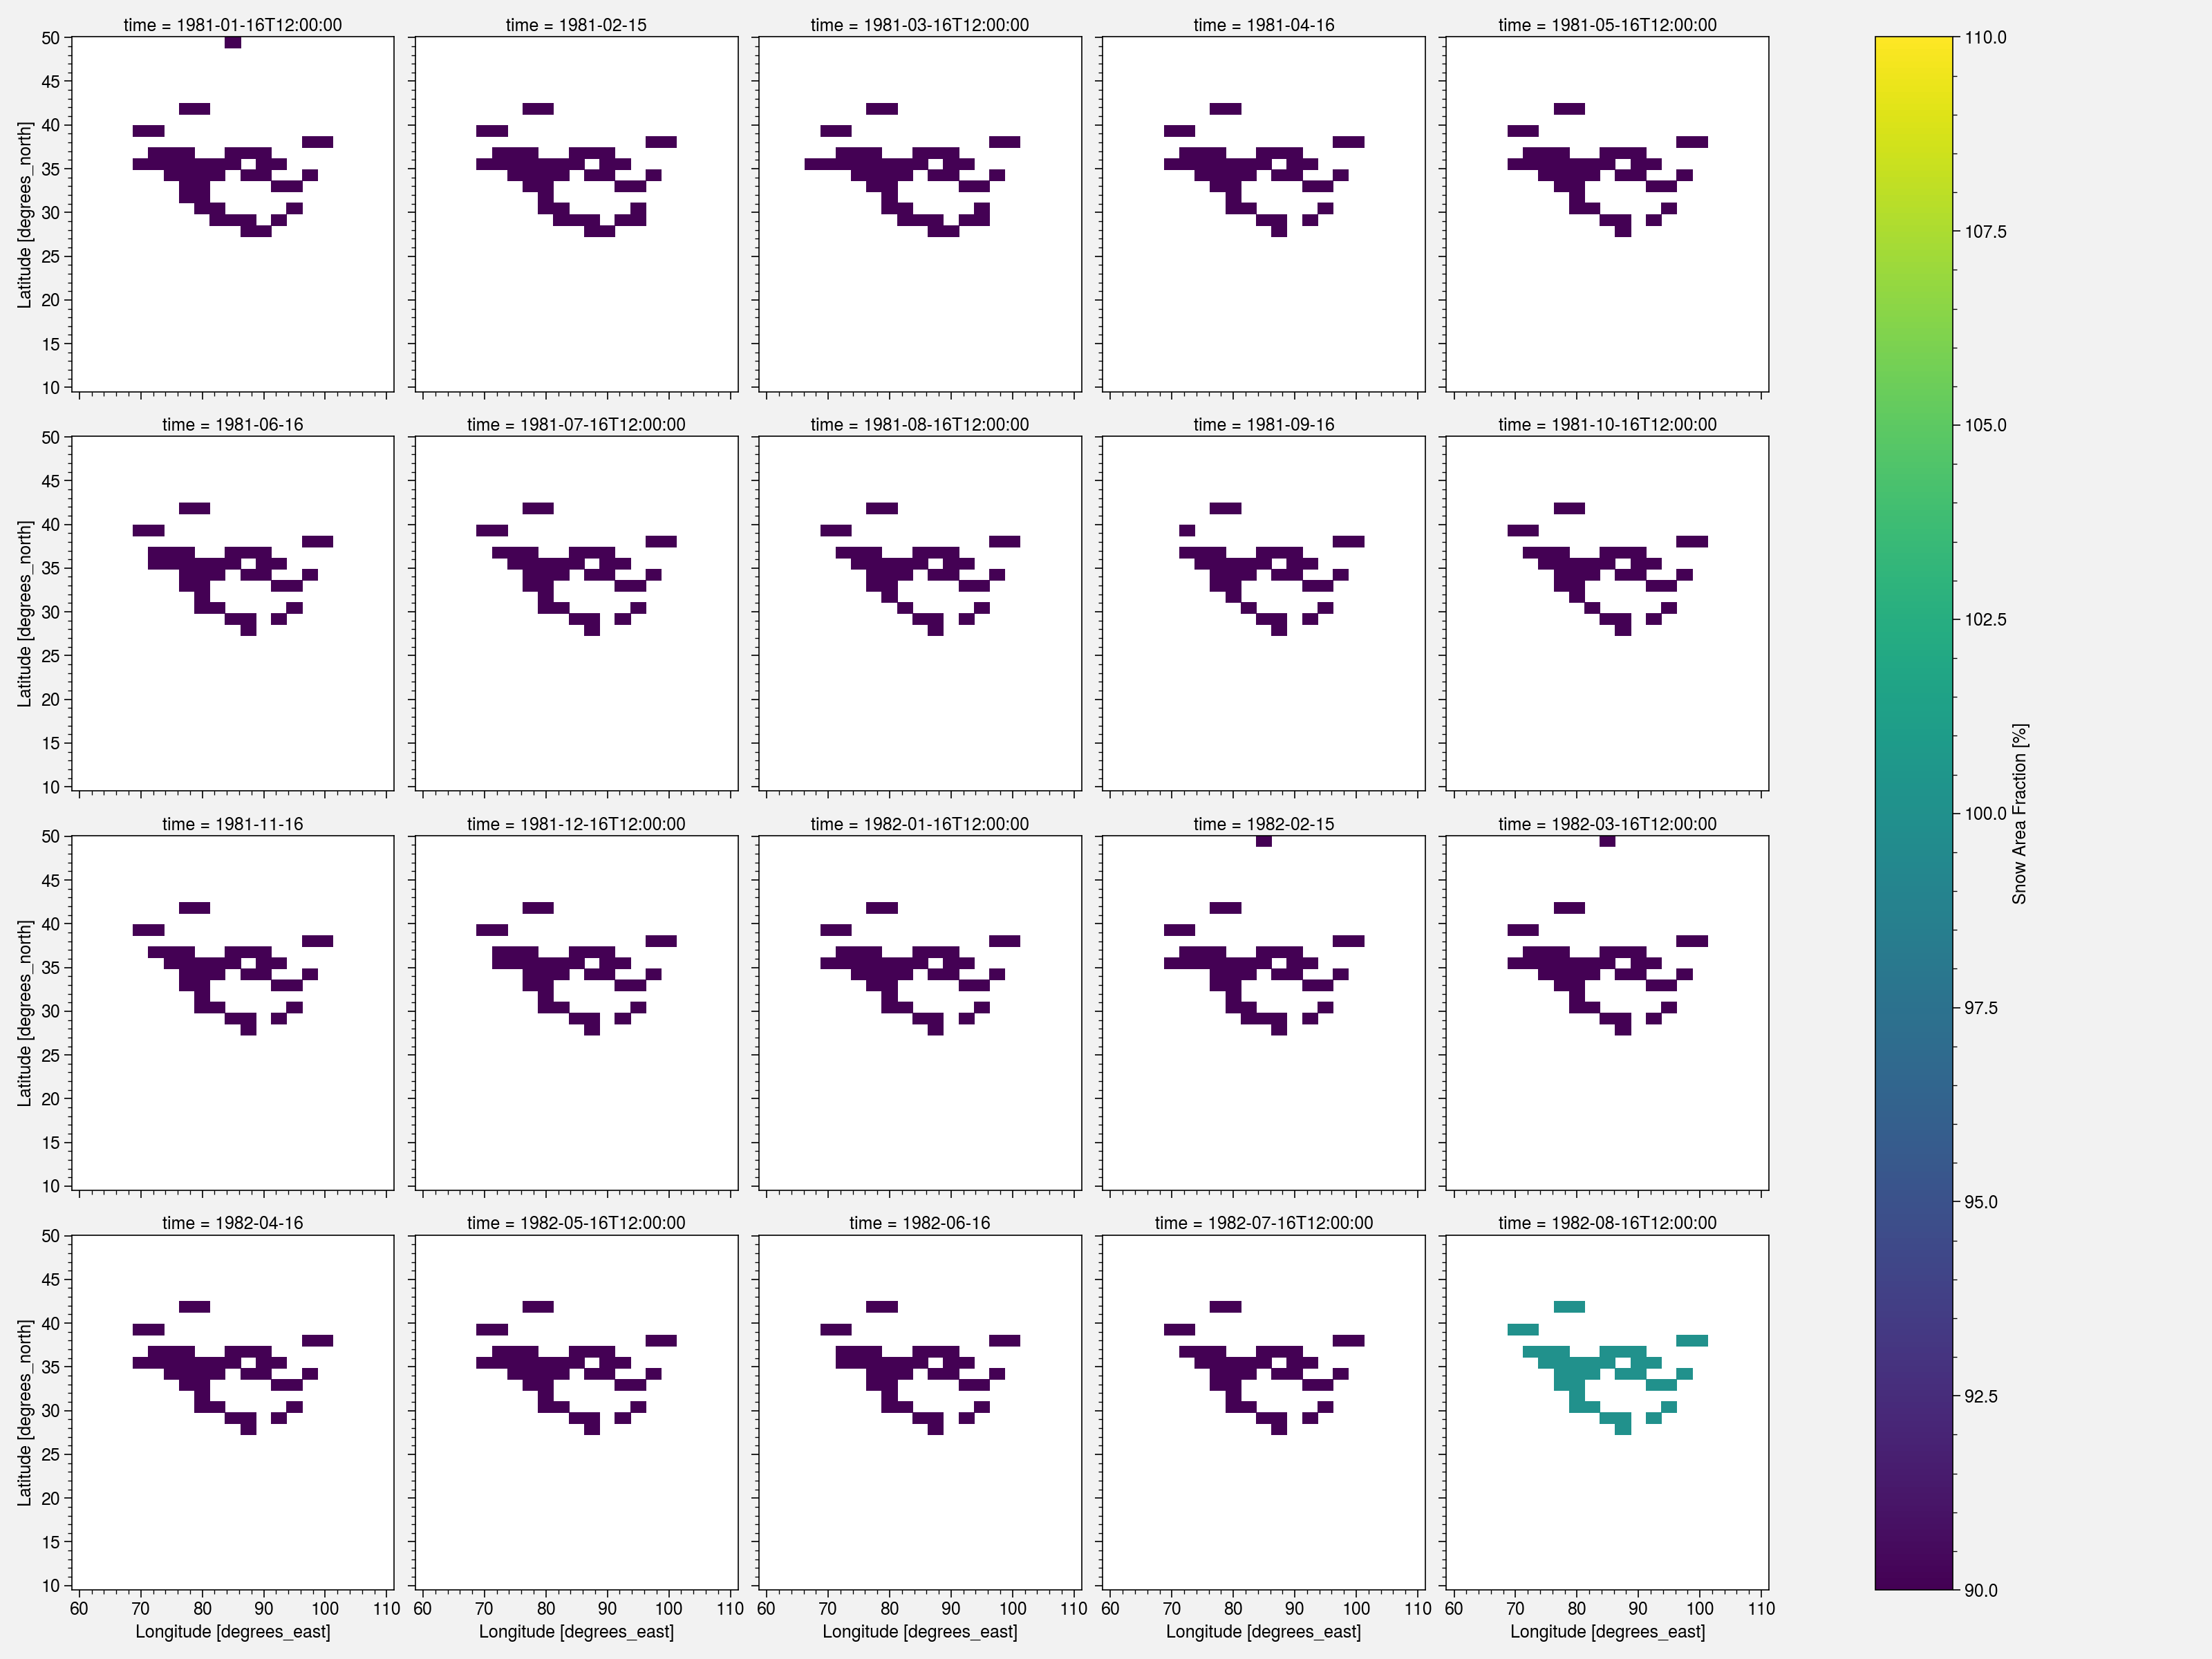

In [95]:
snc_historical[:20].sel(lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1])).where(
    snc_historical[:20].sel(lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1])) == 100
).plot(col='time', col_wrap=5)

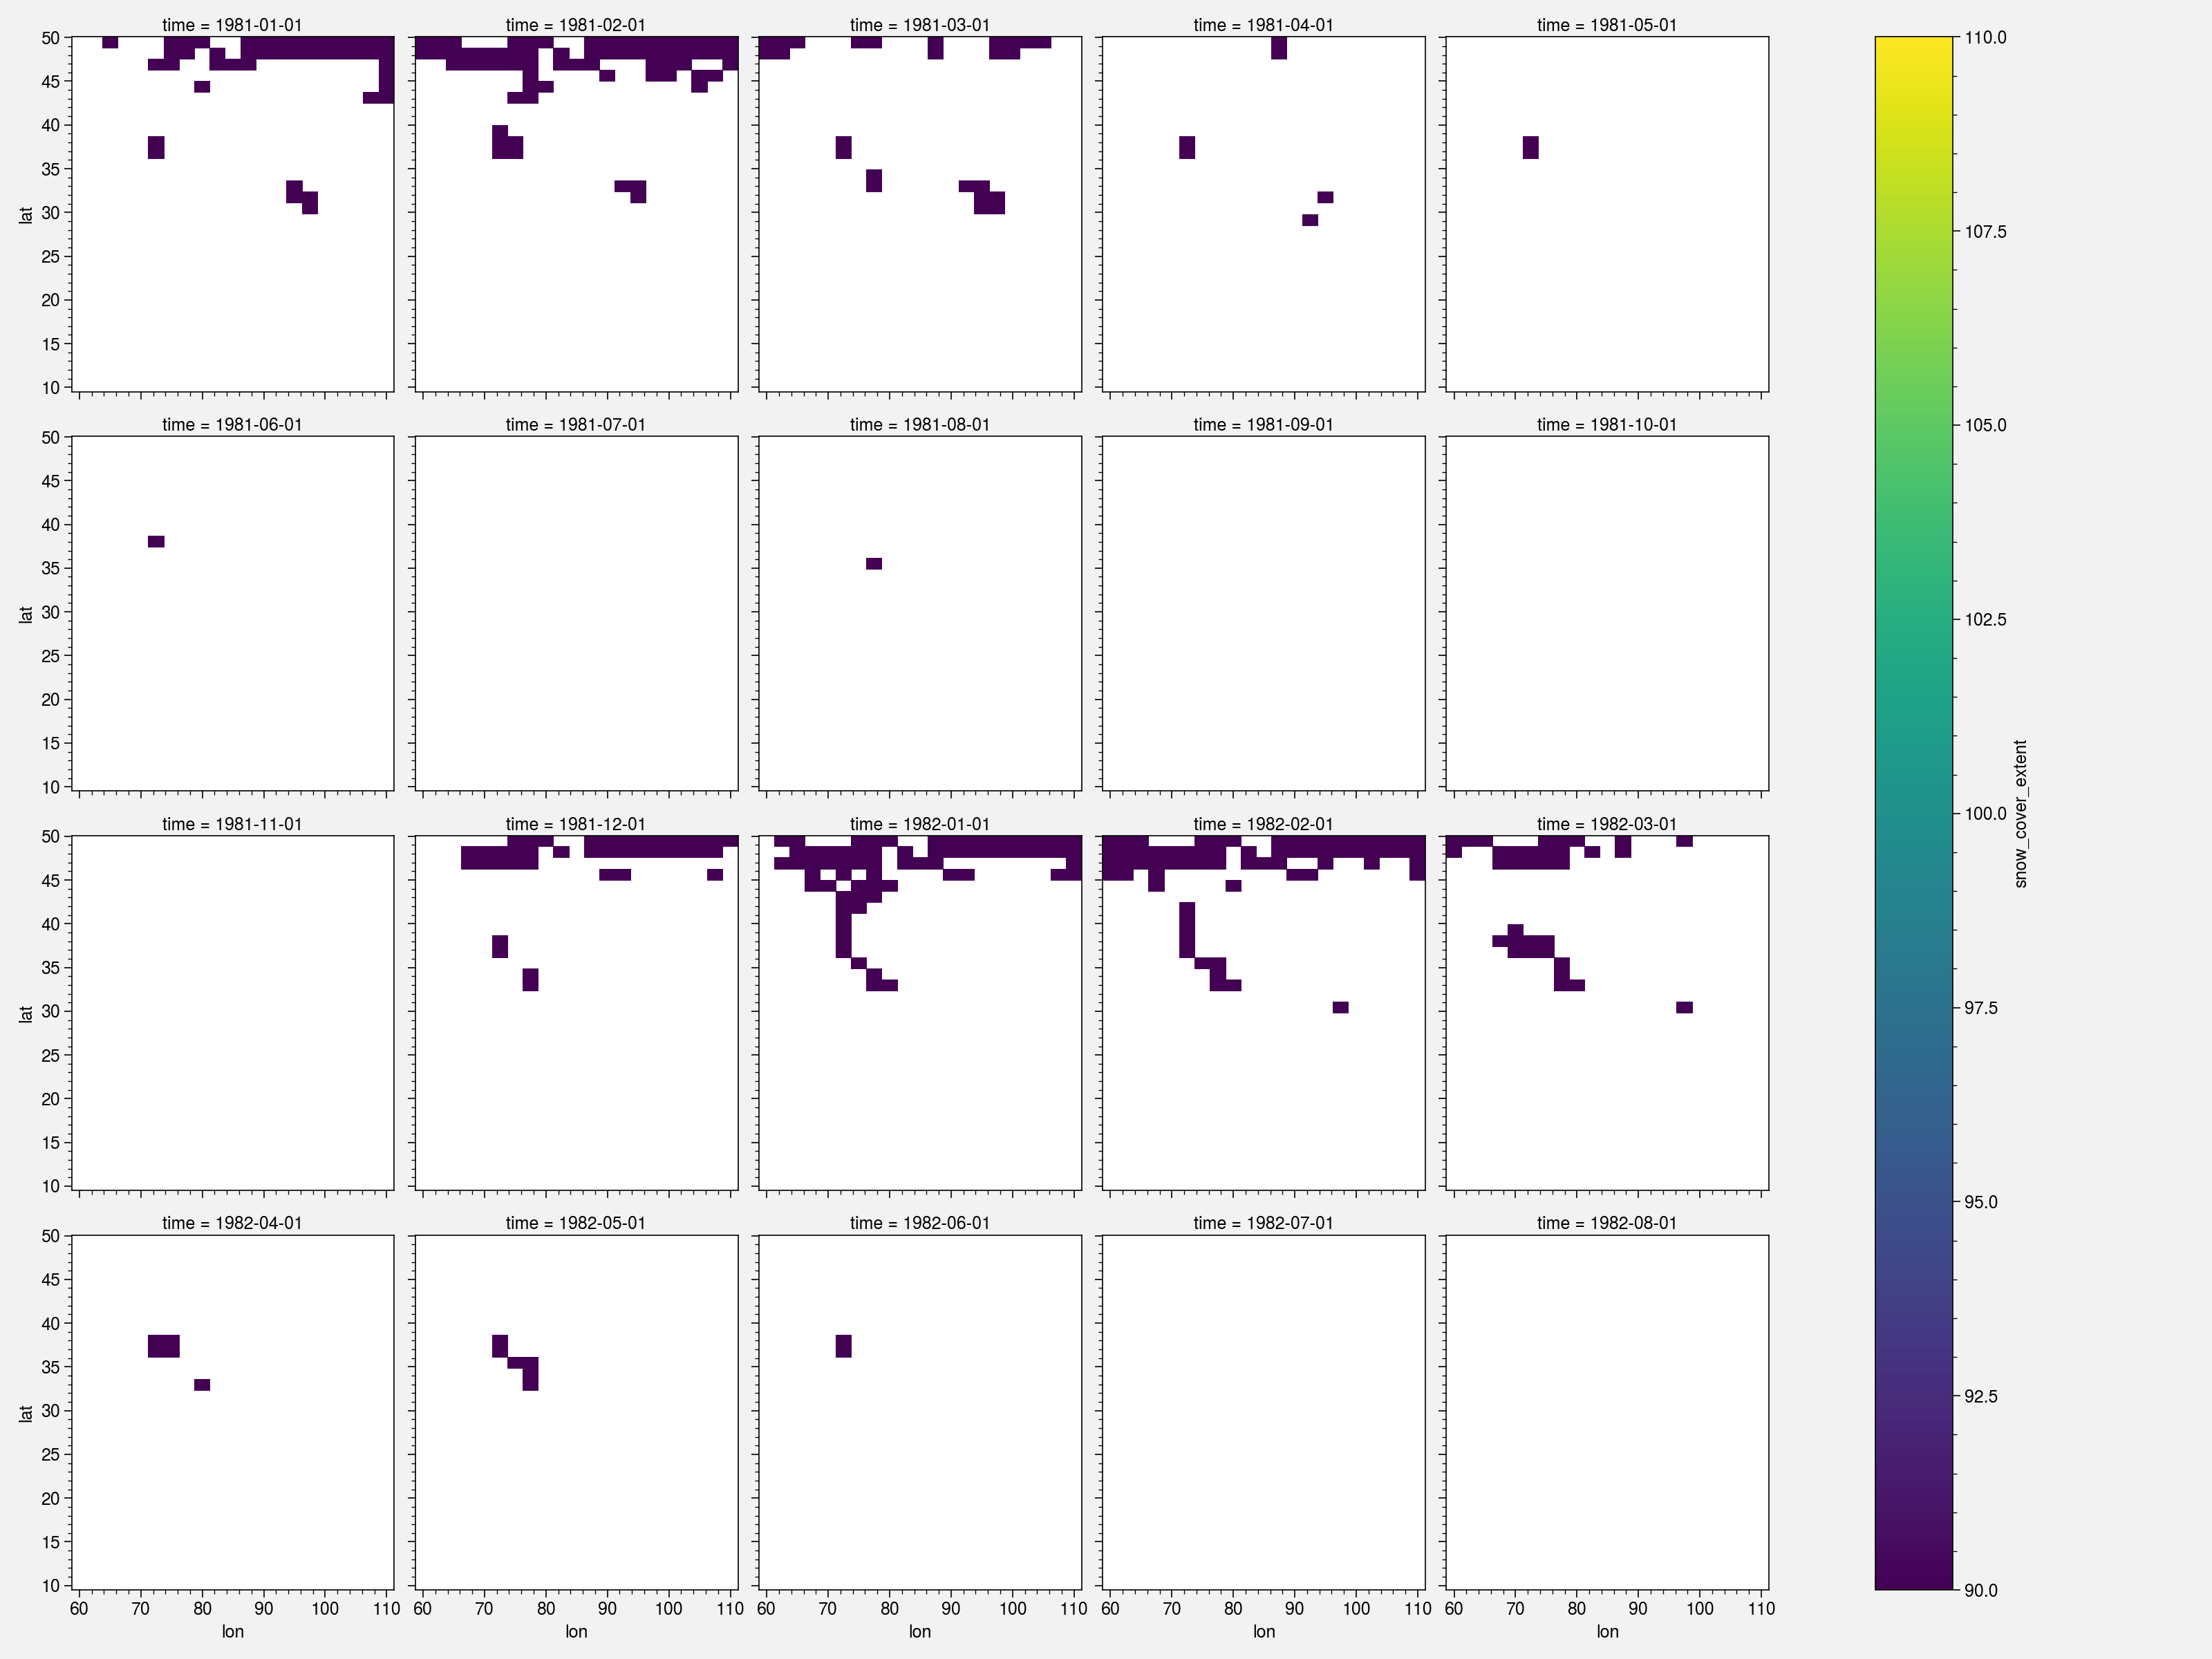

In [97]:
snc_rutger_regrid[:20].sel(lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1])).where(
    snc_rutger_regrid[:20].sel(lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1])) == 100
).plot(col='time', col_wrap=5)

In [88]:
snc_historical.max()

<xarray.DataArray 'snc' ()>
array(100., dtype=float32)

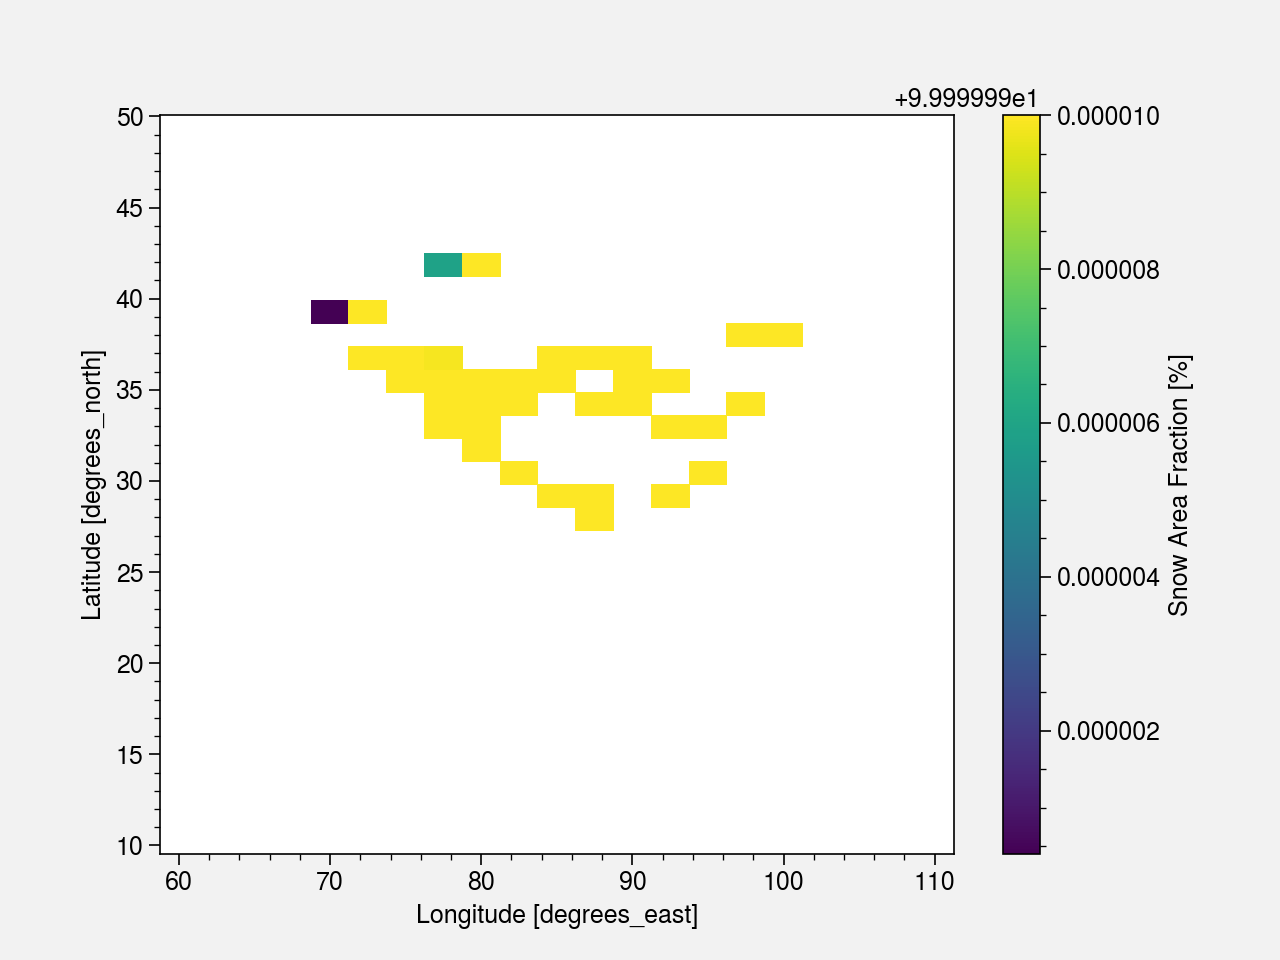

In [78]:
snc_historical_clim.sel(lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1])).where(
    snc_historical_clim.sel(lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1])) > 99
).plot()

In [ ]:
f, axs = plot.subplots(nrows=2, ncols=3, share=0)

axs[0].scatter(
    snc_historical_clim.sel(lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1])).values.flatten(),
    mean_topo.sel(lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1])).values.flatten()
)
axs[0].format(xlabel='snc_historical_clim (%)', ylabel='mean_topo (m)')

axs[1].scatter(
    snc_historical_clim.sel(lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1])).values.flatten(),
    std_topo.sel(lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1])).values.flatten()
)
axs[1].format(xlabel='snc_historical_clim (%)', ylabel='std_topo (m)')

axs[2].scatter(
    snc_historical_clim.sel(lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1])).values.flatten(),
    (orog-mean_topo).sel(lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1])).values.flatten()
)
axs[2].format(xlabel='snc_historical_clim (%)', ylabel='orog-mean_topo (m)')


axs[3].scatter(
    bias[0].sel(lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1])).values.flatten(),
    mean_topo.sel(lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1])).values.flatten()
)
axs[3].format(xlabel='bias snc_historical_clim (%)', ylabel='mean_topo (m)')

axs[4].scatter(
    bias[0].sel(lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1])).values.flatten(),
    std_topo.sel(lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1])).values.flatten()
)
axs[4].format(xlabel='bias snc_historical_clim (%)', ylabel='std_topo (m)')

axs[5].scatter(
    bias[0].sel(lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1])).values.flatten(),
    (orog-mean_topo).sel(lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1])).values.flatten()
)
axs[5].format(xlabel='bias snc_historical_clim (%)', ylabel='orog-mean_topo (m)')

# Check orography

In [34]:
orog = xr.open_dataarray(
    '/bdd/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r1i1p1f1/fx/orog/gr/latest/orog_fx_IPSL-CM6A-LR_historical_r1i1p1f1_gr.nc'
)

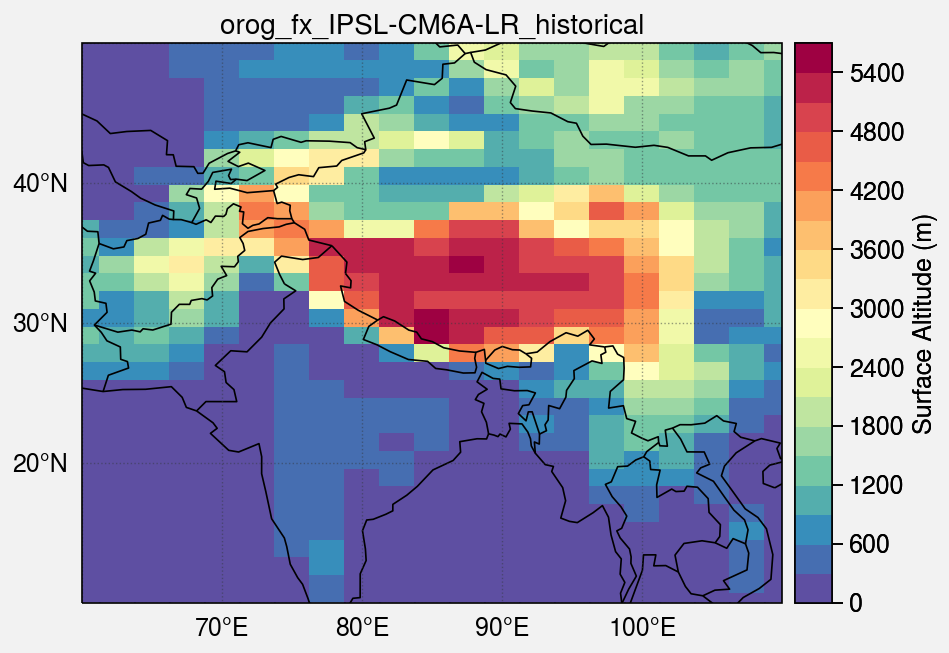

In [36]:
# Differences from Rutger
f, axs = plot.subplots(proj='cyl', ncols=1, nrows=1, share=3, axwidth=3.5)

m = axs[0].pcolormesh(
    orog.sel(lat=slice(10,50), lon=slice(60,110)),
    colorbar='r',
    levels=20,
    cmap='Spectral'
)
axs[0].format(title='orog_fx_IPSL-CM6A-LR_historical')

axs.format(
    geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, labels=True, 
    coast=True, ocean=True, oceancolor='gray3', borders=True,
    lonlines=10, latlines=10, latlim=(10,50), lonlim=(60,110)
)

# f.save('img/orog.pdf')